# 개요  
안경호님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

# 🕹️ Data Description
Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 제작한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다(누적, 단위 : M(Million)).  
EU_Sales : 유럽지역에서의 출고량입니다(누적, 단위 : M(Million)).  
JP_Sales : 일본지역에서의 출고량입니다(누적, 단위 : M(Million)).  
Other_Sales : 기타지역에서의 출고량입니다(누적, 단위 : M(Million)).

# Goal of project
앞서 알려드린 것 처럼.

다음 분기에 어떤 게임을 설계해야 할까

를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

안경호님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 안경호님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 안경호님의 발표를 듣는 사람은 **비데이터 직군**이라 가정합니다.

즉 안경호님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

# Keywords (참조용)
Section 1때 배운 내용들은 다음과 같습니다.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization  
Sprint 2 : Hypothesis Test, CI, Bayesian  
Sprint 3 : DR, PCA, Cluster

# 반드시 들어가야 하는 내용
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

# 기타
발표영상의 시간은 5분으로 제한합니다.  
발표영상 촬영 방법은 다른 문서를 참조하세요.  
가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.  
단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.

추가 : 내 논리의 한계점(Limit)이 무엇인지 밝히기

# 1. 데이터 불러오기 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [ ]:
# 데이터 불러오기
data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(data_url)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 데이터 shape, type 및 결측치 확인
print(df.shape)
print()
print(df.dtypes)
print()
df.isna().sum()

(16598, 10)

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object



Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 결측치 제거 및 type 변환
df = df.dropna() # 결측치가 전체 데이터의 약 2%이므로 제거함
df = df.drop('Unnamed: 0', axis=1) # 불필요한 열 제거(중복된 인덱스 값)
df = df.reset_index(drop=True) # 행 삭제로 인해 빠진 인덱스를 재정렬하기
df = df.astype({'Year': 'int64'}) # 연도를 float64에서 int64로 형변환

# 데이터 shape, type 및 결측치 재확인
print(df.shape)
print()
print(df.dtypes)
print()
df.isna().sum()

df

(16241, 9)

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 년도 중에서 년도 뒤 1자리 혹은 2자리만 있는 값들을 다른 년도들의 형식에 맞춰줌
def yearChange(input):
  if input > 80:
    return input+1900
  else:
    return input+2000

# display(df[df['Year'] < 1980])

df['Year'][df['Year'] < 1980] = df['Year'][df['Year'] < 1980].apply(yearChange)
df[df['Year'] < 1980].count()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# 출고량을 나타내는 열들에 'M'과 'K'가 포함된 것을 확인
sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in sales_col:
  display(df[col][df.loc[:, col].str.contains('M|K', regex=True)])

10        480K
44         60K
142         0K
439      0.58M
450      0.25M
         ...  
15978     720K
16056    0.53M
16127       0M
16137     470K
16222     320K
Name: NA_Sales, Length: 191, dtype: object

10       0.33M
35       0.03M
125         0K
135        50K
173      0.01M
         ...  
15995       0M
16022      50K
16032    0.04M
16170       0K
16215       0M
Name: EU_Sales, Length: 195, dtype: object

10          0K
87          0K
88          0K
485      0.01M
575         0M
         ...  
15963       0K
15969       0K
16121       0K
16144    0.07M
16224       0M
Name: JP_Sales, Length: 196, dtype: object

62          0M
71       0.01M
206         0M
217      0.01M
240         0M
         ...  
15793    0.22M
15795      70K
16036       0K
16060    0.01M
16234      80K
Name: Other_Sales, Length: 197, dtype: object

In [ ]:
# 'M'과 'K' 각각에 대하여 알맞게 처리하기
def toNum(input):
  if 'M' in input:
    # 'M'의 경우 문자가 없는 다른 값들과 동일하게 float(소수) 형태의 숫자를 갖고 있으므로 'M'만 제거
    return float(input.replace('M', ''))
  elif 'K' in input:
    # 'K'의 경우 K를 뺀 숫자가 int(정수) 형태이므로 'K'를 제거한 후 int로 형변환함
    # 그 후 'K'는 1000을 의미하기에 위의 'M'의 값과 단위를 맞춰주기 위해 1000으로 나누어줌
    k = int(input.replace('K', ''))
    return float(k/1000)
    
# 'M', 'K' 포함된 값에 대하여 문자 제거 및 숫자로 형변환
for col in sales_col:
  df[col][df.loc[:, col].str.contains('M|K', regex=True)] = df[col][df.loc[:, col].str.contains('M|K', regex=True)].apply(toNum)

for col in sales_col:
  display(df.loc[:, col].str.contains('M|K', regex=True).sum())

0

0

0

0

In [ ]:
# 출고량 열의 형변환
df.loc[:, 'NA_Sales':'Other_Sales'] = df.loc[:, 'NA_Sales':'Other_Sales'].apply(pd.to_numeric)

df = df.astype({'Year': 'object'}) # 연도를 int64에서 object로 형변환(그룹화 목적)

print(df.dtypes)

# 출고량 합계 열 만들기
df['Sales_Sum'] = df.loc[:, 'NA_Sales':'Other_Sales'].sum(axis=1)

# 데이터 값의 통계치 확인
df.describe()

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,0.265195,0.147378,0.078283,0.048234,0.539091
std,0.822431,0.508340,0.309272,0.189678,1.563905
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


# 2. 데이터 분석
2-1. 지역에 따라서 선호하는 게임 장르가 다를까  
2-2. 연도별 게임의 트렌드가 있을까  
2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# 2-1. 지역에 따라서 선호하는 게임 장르가 다를까
# 지역별 출고량을 비교하여 각 지역별 게임 장르 선호도가 다른지 알아보고자 함
df_genre = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Other_Sales']
df_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [ ]:
# 지역별 출고량 규모가 다르므로 정규화를 하여 데이터의 스케일을 맞춰줌
scaler = MinMaxScaler()
df_genre_norm = pd.DataFrame(scaler.fit_transform(df_genre), columns=df_genre.columns, index=df_genre.index)
df_genre_norm

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,1.000000,1.000000,0.388581,1.000000
Adventure,0.042937,0.040186,0.044922,0.031662
Fighting,0.192839,0.117486,0.160656,0.144246
Misc,0.413316,0.348385,0.216571,0.355464
Platform,0.477355,0.332345,0.303035,0.232809
Puzzle,0.067959,0.012052,0.059262,0.007004
Racing,0.362704,0.405699,0.059524,0.377865
Role-Playing,0.317263,0.294932,1.000000,0.263371
Shooter,0.640583,0.566123,0.000000,0.524601


In [ ]:
# 지역별 출고량 간의 상관관계 분석
df_genre_norm.corr()

# 분석 결과 다른 3개 지역이 서로 비슷한 것에 비해 JP(일본) 지역은 다소 다른 경향을 보임을 알 수 있다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


In [ ]:
# 정규화한 데이터를 바탕으로 각 지역별 게임 장르 선호도의 순위를 나열
df_rank = pd.DataFrame()
for sales in sales_col:
  df_rank[sales] = df_genre_norm[sales].rank(ascending=False).sort_values().index

df_rank.index += 1
df_rank.index.name = 'Ranking'
df_rank

# NA, EU, Other 지역에서는 Action, Sports, Shooter 순으로 선호하는 것을 알 수 있음
# 이와 달리 JP 지역은 Role-Playing을 가장 선호하고 그 이후에 Action, Sports를 선호하는 것으로 나타남

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Ranking,,,,
1,Action,Action,Role-Playing,Action
2,Sports,Sports,Action,Sports
3,Shooter,Shooter,Sports,Shooter
4,Platform,Racing,Platform,Racing
5,Misc,Misc,Misc,Misc
6,Racing,Platform,Fighting,Role-Playing
7,Role-Playing,Role-Playing,Simulation,Platform
8,Fighting,Simulation,Racing,Fighting
9,Simulation,Fighting,Puzzle,Simulation


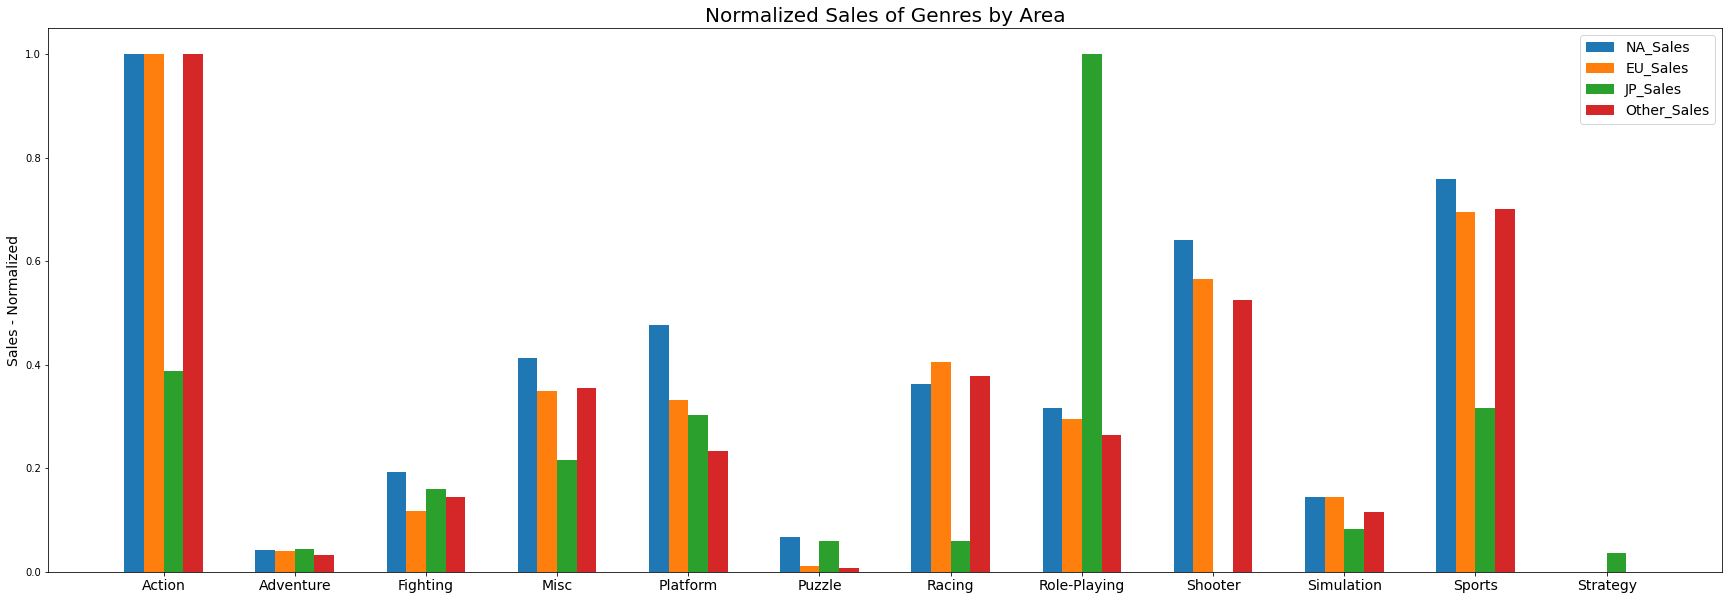

In [ ]:
# 정규화한 데이터를 이용하여 지역별 게임 장르 선호도를 시각화
genre_sales_norm = [df_genre_norm['NA_Sales'], df_genre_norm['EU_Sales'], df_genre_norm['JP_Sales'], df_genre_norm['Other_Sales']]
genre_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

def genresByAreaBar():
  x = np.arange(len(genre_labels))  # the label locations
  width = 0.15  # the width of the bars
  fig, ax = plt.subplots(figsize=(30, 10))
  rects1 = ax.bar(x - width*3/2, genre_sales_norm[0], width, label=sales_col[0])
  rects2 = ax.bar(x - width/2, genre_sales_norm[1], width, label=sales_col[1])
  rects3 = ax.bar(x + width/2, genre_sales_norm[2], width, label=sales_col[2])
  rects4 = ax.bar(x + width*3/2, genre_sales_norm[3], width, label=sales_col[3])

  ax.set_ylabel('Sales - Normalized', fontsize=14)
  ax.set_title('Normalized Sales of Genres by Area', fontsize=20)
  ax.set_xticks(x)
  ax.set_xticklabels(genre_labels, fontsize=14)
  ax.legend(fontsize=14)

genresByAreaBar()
plt.show()

# JP 지역의 Role-Playing 선호도가 다른 지역에 비해 압도적으로 높은 것을 알 수 있음
# NA, EU, Other 지역의 선호도는 대체로 비슷한 것으로 보임

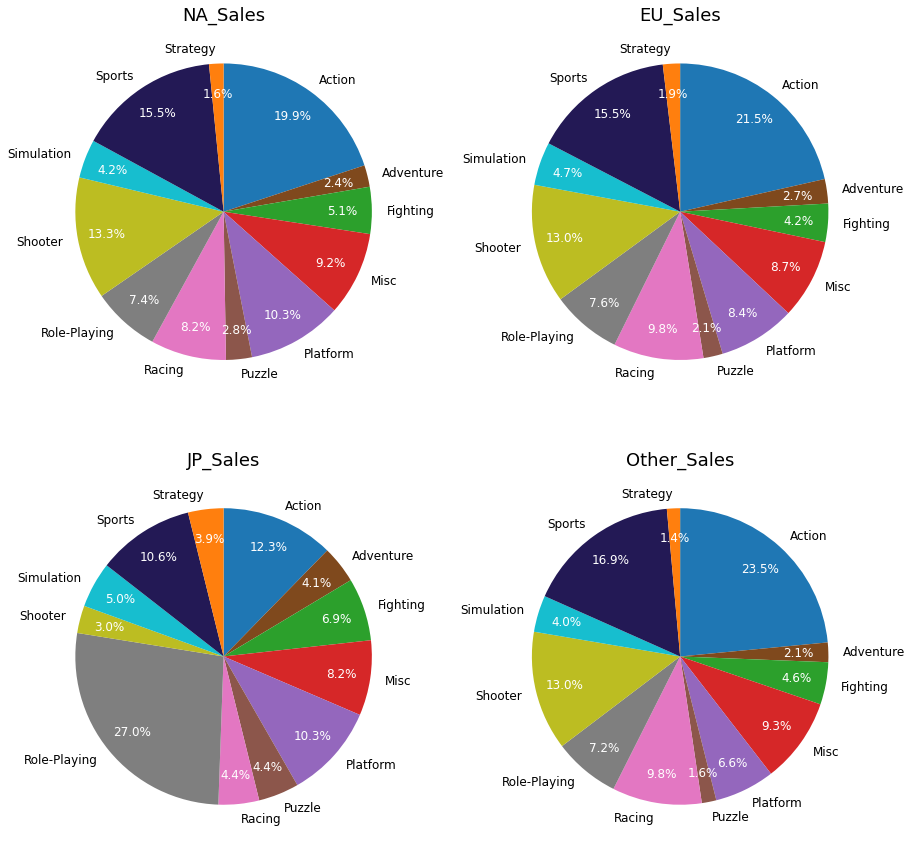

In [ ]:
# 각 지역별 게임 장르 각각이 차지하는 출고량 비율을 시각화함(정규화하지 않은 데이터)
genre_sales = [df_genre['NA_Sales'], df_genre['EU_Sales'], df_genre['JP_Sales'], df_genre['Other_Sales']]
# genre_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
colors = ['#1F77B4', '#7F491D', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF', '#231955', '#FF7F0E', '#E6C229', '#F17105', '#D11149', '#6610F2', '#1A8FE3', '#F49097', '#DFB2F4', '#F5E960', '#F2F5FF', '#55D6C2', '#9EE493', '#DAF7DC', '#ABC8C0', '#70566D', '#A393BF', '#34F6F2', '#36F21D', '#DBD940', '#42022B', '#1B27CF', '#CC1D80']

def genresByAreaPie():
  ax_nums = [(0, 0), (0, 1), (1, 0), (1, 1)]

  fig, axes = plt.subplots(2, 2, figsize=(15,15))
  for i, g_sales in enumerate(genre_sales):
    _, _, autotexts = axes[ax_nums[i]].pie(g_sales, labels=genre_labels, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False, textprops={'fontsize': 12}, pctdistance=0.8)
    axes[ax_nums[i]].set_title(sales_col[i], fontdict = {'fontsize': 18})
    for autotext in autotexts:
        autotext.set_color('white')

genresByAreaPie()
plt.show()

In [ ]:
# 2-2. 연도별 게임의 트렌드가 있을까
df_trend = df[['Year', 'Genre', 'Platform']]

# 연도별 각 게임 장르 출시 횟수 데이터를 가져옴(tidy data)
count_yg = pd.DataFrame(df_trend[['Year', 'Genre']].value_counts())
count_yg.rename(columns = {0:'Count'}, inplace=True)
count_yg.reset_index(inplace=True)
count_yg

# tidy -> wide 형태로 전환
pivot_yg = count_yg.pivot_table(index=['Year'], columns=['Genre'], values=['Count'])
pivot_yg = pivot_yg['Count'].fillna(0)

# 2017년과 2020년의 데이터를 제외시킴
# 2016년까지의 데이터 추세에 비교했을 때 17년과 20년은 데이터 수집이 완전하지 못하여 수치가 현저히 낮은 것으로 판단하였음
# 이를 그대로 포함시킬 경우 이후의 분석에 있어 잘못된 결과를 얻을 위험이 있음
pivot_yg.drop([2017, 2020], axis=0, inplace=True)
pivot_yg

# 매년 각 장르별 출시 횟수를 백분위로 변경
pivot_yg = pivot_yg.div(pivot_yg.sum(axis=1), axis=0)
pivot_yg

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.125000,0.000000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
1981,0.543478,0.000000,0.000000,0.000000,0.065217,0.043478,0.021739,0.000000,0.217391,0.021739,0.086957,0.000000
1982,0.500000,0.000000,0.000000,0.027778,0.138889,0.083333,0.055556,0.000000,0.138889,0.000000,0.055556,0.000000
1983,0.411765,0.058824,0.000000,0.058824,0.294118,0.058824,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
1984,0.071429,0.000000,0.000000,0.071429,0.071429,0.214286,0.214286,0.000000,0.214286,0.000000,0.142857,0.000000
1985,0.142857,0.000000,0.071429,0.000000,0.285714,0.285714,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000
1986,0.285714,0.000000,0.000000,0.000000,0.285714,0.000000,0.047619,0.047619,0.190476,0.000000,0.142857,0.000000
1987,0.125000,0.062500,0.125000,0.000000,0.125000,0.000000,0.000000,0.187500,0.125000,0.000000,0.250000,0.000000
1988,0.133333,0.000000,0.000000,0.000000,0.266667,0.066667,0.066667,0.200000,0.066667,0.066667,0.133333,0.000000


In [ ]:
# 연도별 각 게임 플랫폼별 게임 출시 횟수 데이터를 가져옴(tidy data)
count_yp = pd.DataFrame(df_trend[['Year', 'Platform']].value_counts())
count_yp.rename(columns = {0:'Count'}, inplace=True)
count_yp.reset_index(inplace=True)
count_yp

# tidy -> wide 형태로 전환
pivot_yp = count_yp.pivot_table(index=['Year'], columns=['Platform'], values=['Count'])
pivot_yp = pivot_yp['Count'].fillna(0)

# 2017년과 2020년의 데이터를 제외시킴
# 2016년까지의 데이터 추세에 비교했을 때 17년과 20년은 데이터 수집이 완전하지 못하여 수치가 현저히 낮은 것으로 판단하였음
# 이를 그대로 포함시킬 경우 이후의 분석에 있어 잘못된 결과를 얻을 위험이 있음
pivot_yp.drop([2017, 2020], axis=0, inplace=True)
pivot_yp

# 매년 각 플랫폼별 출시 횟수를 백분위로 변경
pivot_yp = pivot_yp.div(pivot_yp.sum(axis=1), axis=0)
pivot_yp

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1982,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1983,0.647059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1986,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1987,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.133333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


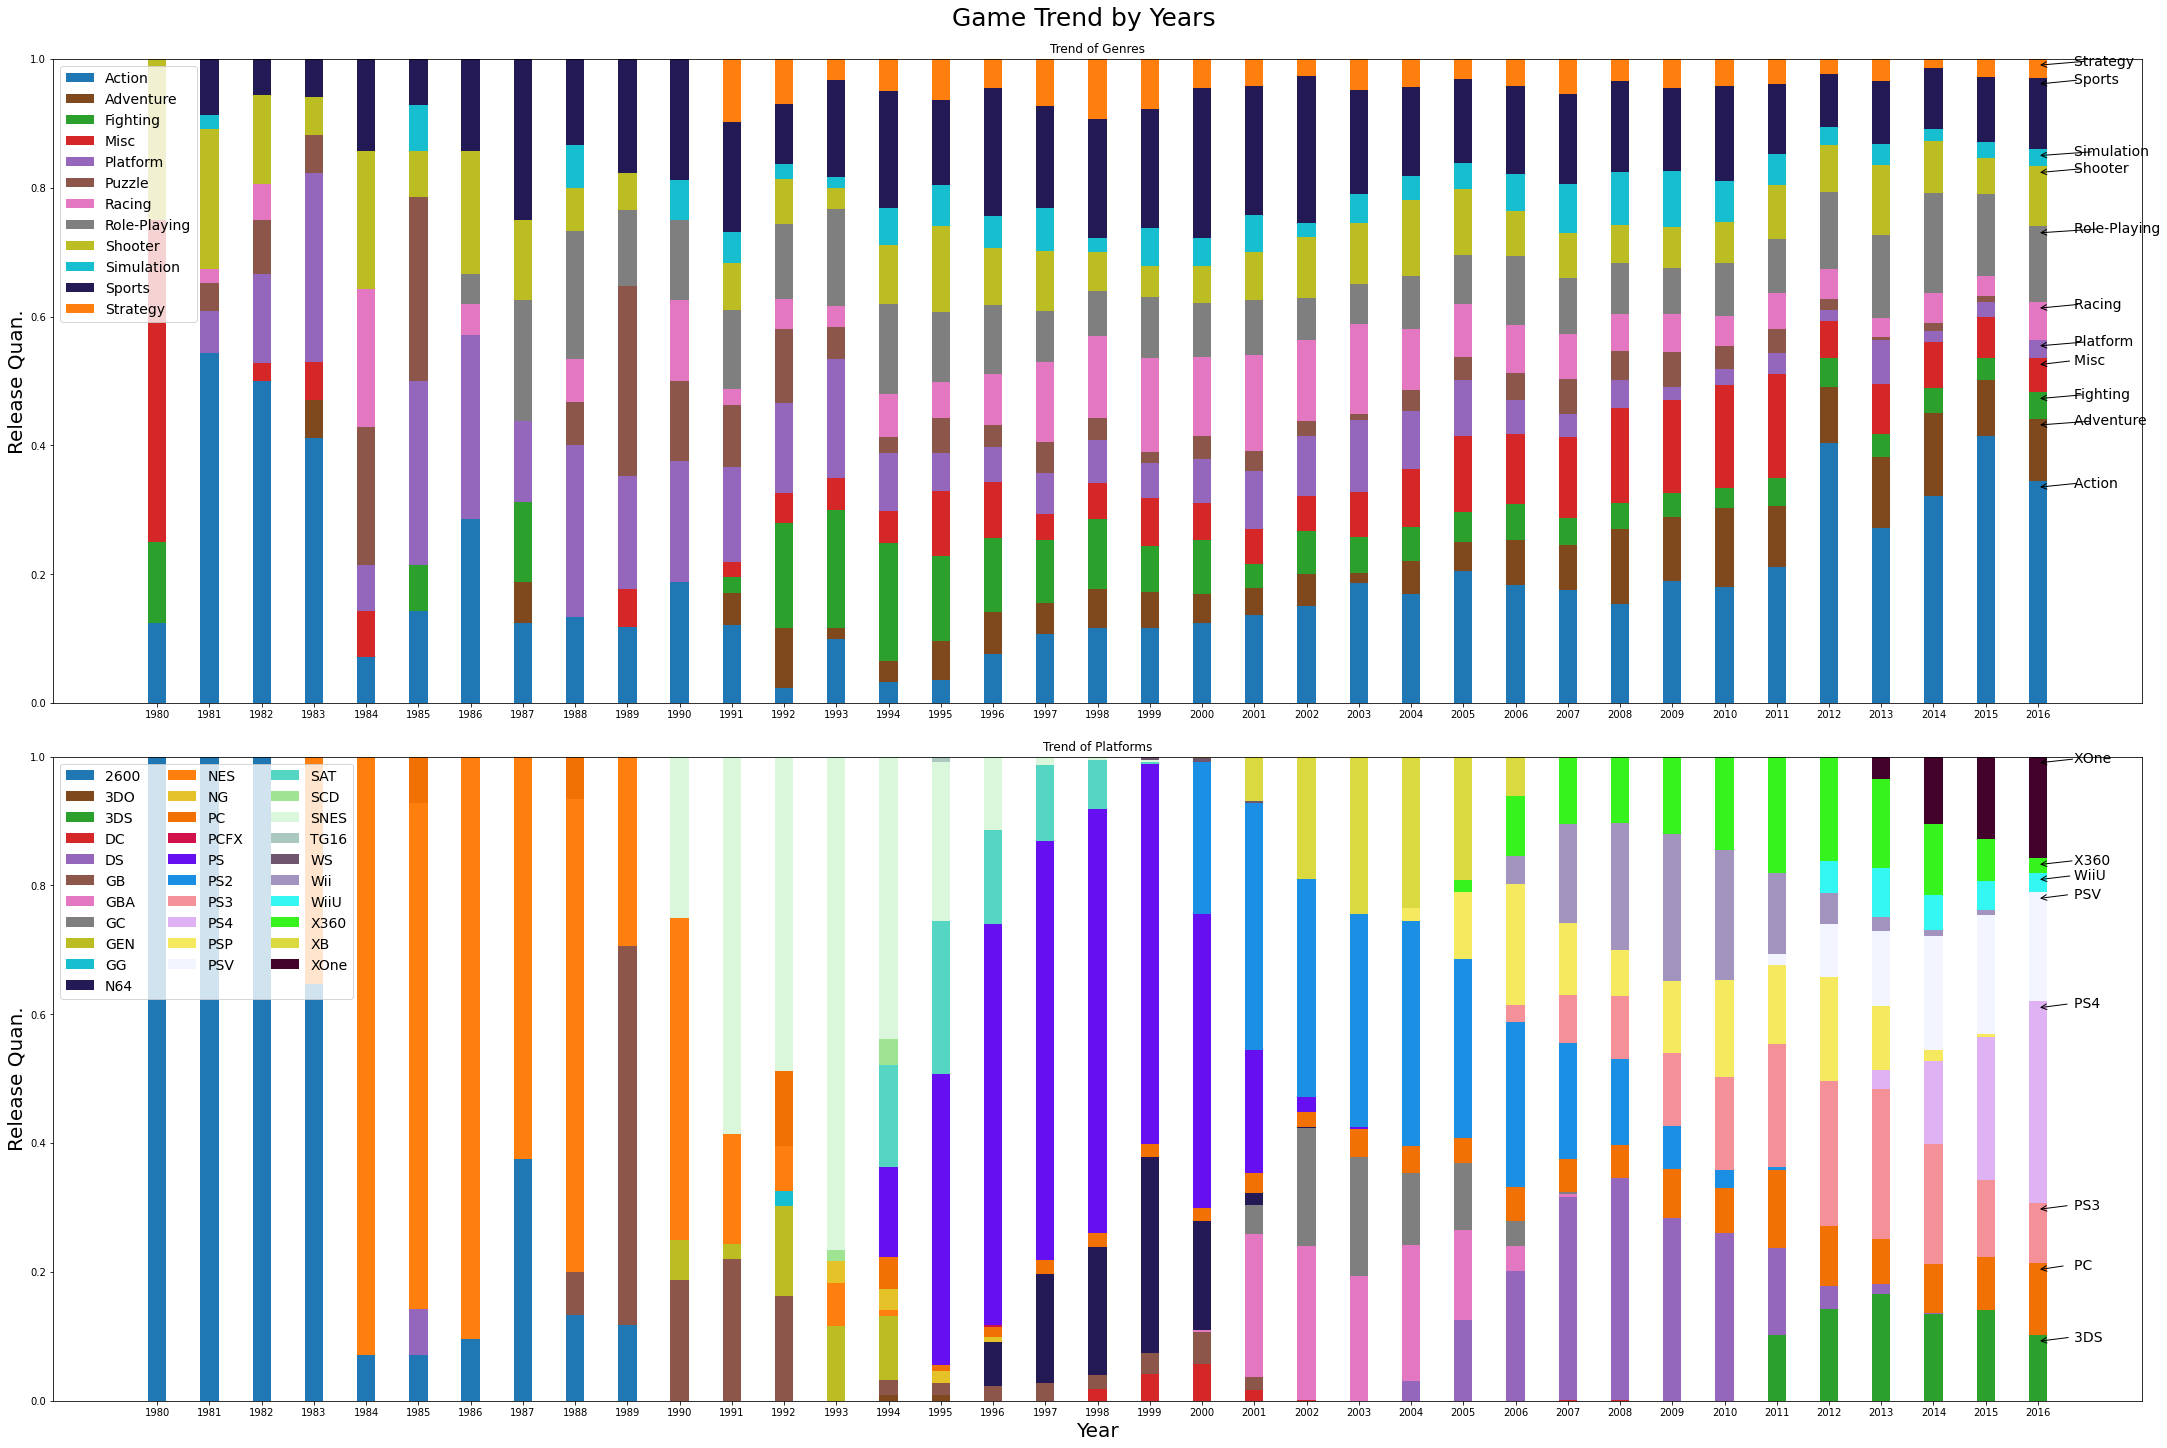

In [ ]:
# 연도별 게임 출시 횟수의 백분율을 장르/플랫폼으로 구분하여 바 차트로 시각화
range_of_year = 0
year = pivot_yp.index[range_of_year:]
platforms = pivot_yp.columns
yg = pivot_yg[range_of_year:]
yp = pivot_yp[range_of_year:]

N = len(year)
ind = np.arange(N)
width = 0.35

def trendByYearsBar():
  fig, axes = plt.subplots(2, 1, figsize=(30, 20), constrained_layout=True)

  bars = []
  vals = []
  for i, (genre, color) in enumerate(zip(genre_labels, colors)):
    if len(bars) == 0:
      axes[0].bar(ind, yg[genre], width, color=color, label=genre)
      bars.append(1)
      vals = yg[genre].copy()
    else:
      axes[0].bar(ind, yg[genre], width, color=color, label=genre, bottom=vals)
      vals += yg[genre].copy()

    if yg[genre].iloc[-1] != 0:
      axes[0].annotate('        '+genre, xy=(ind[-1], vals.iloc[-1]-0.01), ha='left', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=14)

  axes[0].legend(loc='upper left', fontsize=14)
  axes[0].set_title('Trend of Genres')
  axes[0].set_xticks(ind)
  axes[0].set_xticklabels(year)
  axes[0].set_ylabel('Release Quan.', fontsize=20)

  bars = []
  vals = []
  for platform, color in zip(platforms, colors):
    if len(bars) == 0:
      axes[1].bar(ind, yp[platform], width, color=color, label=platform)
      bars.append(1)
      vals = yp[platform].copy()
    else:
      axes[1].bar(ind, yp[platform], width, color=color, label=platform, bottom=vals)
      vals += yp[platform].copy()

    if yp[platform].iloc[-1] != 0:
      axes[1].annotate('        '+platform, xy=(ind[-1], vals.iloc[-1]-0.01), fontsize=14, ha='left', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

  axes[1].legend(loc='upper left', fontsize=14, ncol=3)
  axes[1].set_title('Trend of Platforms')
  axes[1].set_xticks(ind)
  axes[1].set_xticklabels(year)
  axes[1].set_ylabel('Release Quan.', fontsize=20)
  axes[1].set_xlabel('Year', fontsize=20)

  plt.suptitle('Game Trend by Years', fontsize=25)

trendByYearsBar()
plt.show()

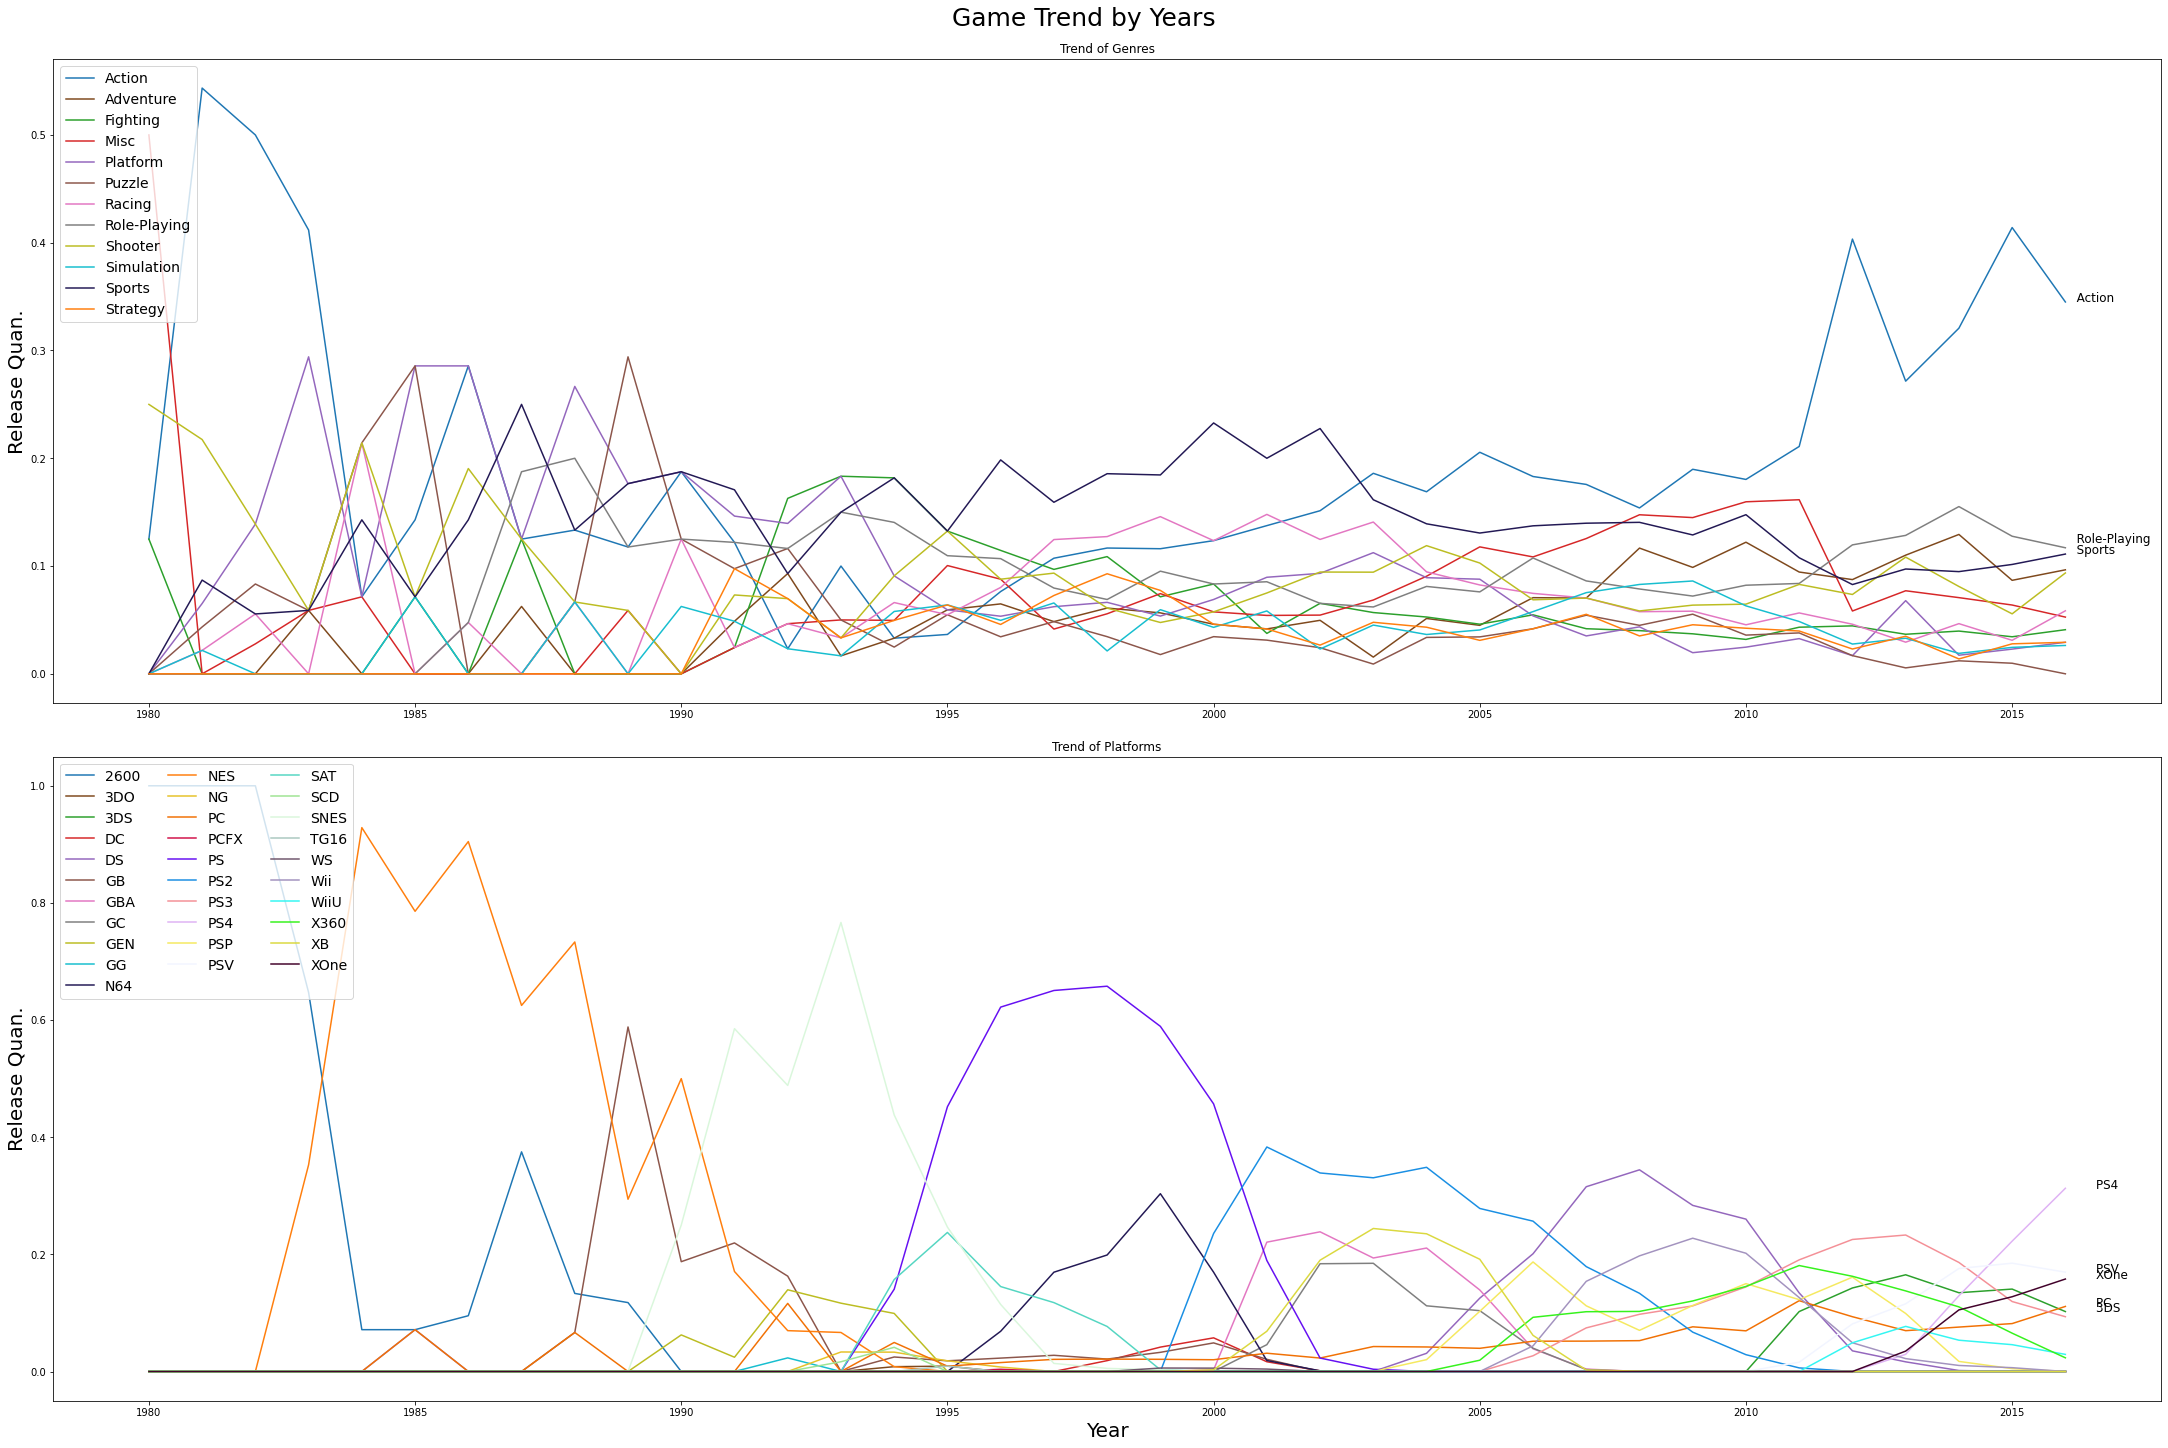

In [ ]:
# 연도별 게임 장르 트렌드와 플랫폼별 트렌드를 라인 차트로 표현
def trendByYearsLine():
  fig, axes = plt.subplots(2, 1, figsize=(30, 20), constrained_layout=True)

  for genre, color in zip(genre_labels, colors):
    axes[0].plot(year, yg[genre], color=color, label=genre)
    # if yg[genre].iloc[-1] >= 0.1:
    #   axes[0].annotate('        '+genre, fontsize=12, xy=(year[-1], yg[genre].iloc[-1]), ha='left')
      # axes[0].annotate(genre, xy=(yg[yg[genre] == yg[genre].max()].index[0], yg[genre].max()))

  axes[0].annotate('   Action', fontsize=12, xy=(year[-1], yg['Action'].iloc[-1]), ha='left')
  axes[0].annotate('   Role-Playing', fontsize=12, xy=(year[-1], yg['Role-Playing'].iloc[-1]+0.005), ha='left')
  axes[0].annotate('   Sports', fontsize=12, xy=(year[-1], yg['Sports'].iloc[-1]), ha='left')
  axes[0].legend(loc='upper left', fontsize=14)
  axes[0].set_title('Trend of Genres')
  axes[0].set_ylabel('Release Quan.', fontsize=20)

  for platform, color in zip(platforms, colors):
    axes[1].plot(year, yp[platform], color=color, label=platform)
    # axes[1].annotate(platform, xy=(yp[yp[platform] == yp[platform].max()].index[0], yp[platform].max()))
    if yp[platform].iloc[-1] >= 0.1:
      axes[1].annotate('        '+platform, fontsize=12, xy=(year[-1], yp[platform].iloc[-1]), ha='left')

  axes[1].legend(loc='upper left', fontsize=14, ncol=3)
  axes[1].set_title('Trend of Platforms')
  axes[1].set_ylabel('Release Quan.', fontsize=20)
  axes[1].set_xlabel('Year', fontsize=20)

  plt.suptitle('Game Trend by Years', fontsize=25)

trendByYearsLine()
plt.show();

In [ ]:
# 2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
# 출고량 총계 상위 10개 게임 데이터 가져오기
df_ranking = df.sort_values(by=['Sales_Sum'], ascending=False).reset_index(drop=True)
df_topten = df_ranking.head(10)
df_topten

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# 출고량 지역별 상위 10개 게임 데이터 가져오기
df_topten_na = df_ranking.sort_values(by=['NA_Sales'], ascending=False).head(10)
df_topten_eu = df_ranking.sort_values(by=['EU_Sales'], ascending=False).head(10)
df_topten_jp = df_ranking.sort_values(by=['JP_Sales'], ascending=False).head(10)
df_topten_ot = df_ranking.sort_values(by=['Other_Sales'], ascending=False).head(10)

display(df_topten_na)
display(df_topten_eu)
display(df_topten_jp)
display(df_topten_ot)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
14,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
40,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
210,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
46,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
345,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.62
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
10,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75


In [ ]:
# 총계 및 지역별 상위 10개 게임에 대한 Publisher별 갯수 세기
toptens = pd.concat([df_topten, df_topten_na, df_topten_eu, df_topten_jp, df_topten_ot]).drop_duplicates().reset_index(drop=True)
toptens['Publisher'].value_counts()

Nintendo                        20
Take-Two Interactive             2
Microsoft Game Studios           1
Sony Computer Entertainment      1
Capcom                           1
Konami Digital Entertainment     1
Name: Publisher, dtype: int64

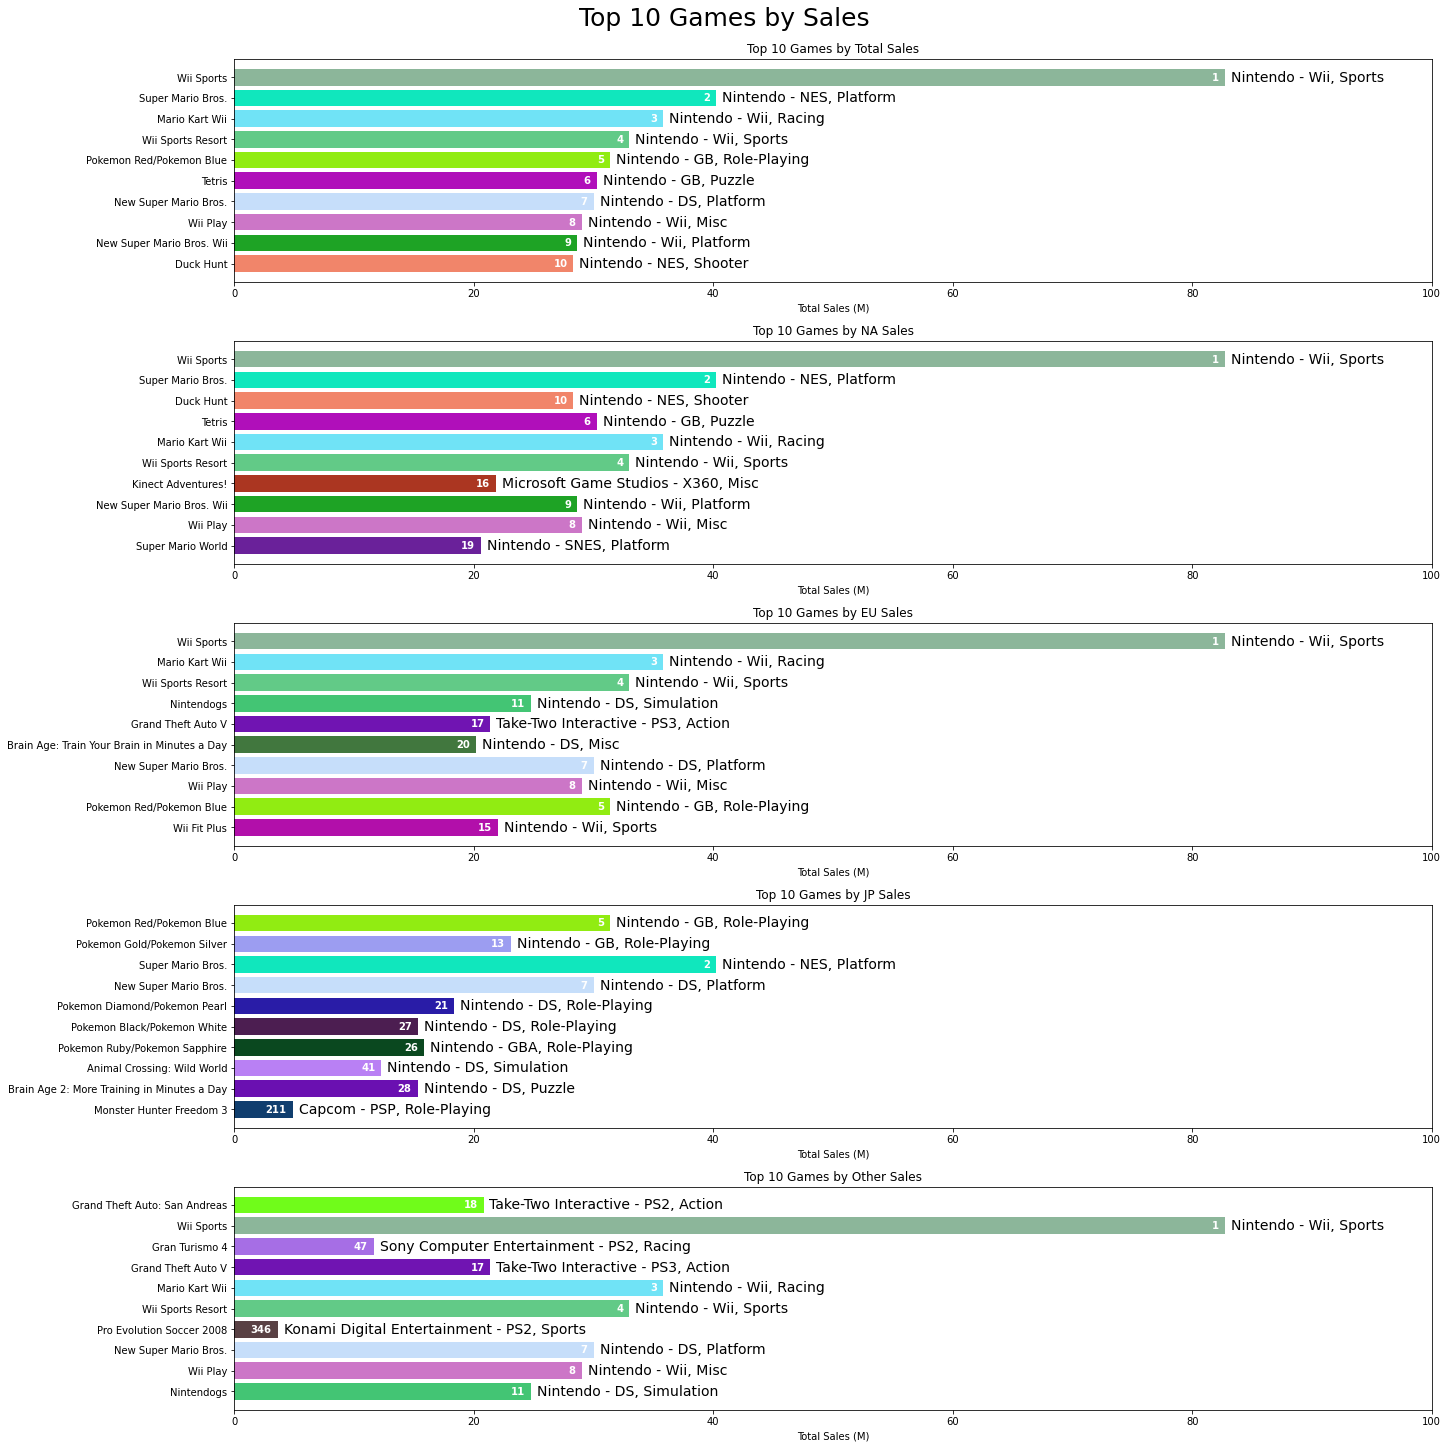

In [ ]:
# 출고량 상위 10개 게임에 대하여 bar chart로 시각화(총계 및 4개 지역별)
def topTenGamesBars():
  fig, axes = plt.subplots(5, 1, figsize=(20, 20), constrained_layout=True)

  sales_dfs = [df_topten, df_topten_na, df_topten_eu, df_topten_jp, df_topten_ot]
  titles = ['Total Sales', 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']

  # 각 데이터별로 고유의 색상을 가질 수 있도록 해줌(비교에 용이하도록)
  color_map = dict()
  np.random.seed(0)
  for i, name in enumerate(df_ranking.head(500)['Name']):
    rgb = np.random.rand(3,)
    color_map[name] = rgb

  # 각 주제별로 출고량 상위 10개 게임 시각화
  for i, sales_df in enumerate(sales_dfs):
    name = sales_df['Name']
    pub = sales_df['Publisher']
    genre = sales_df['Genre']
    pf = sales_df['Platform']
    y_pos = np.arange(len(name))
    sales_sum = sales_df['Sales_Sum']

    axes[i].barh(y_pos, sales_sum, align='center', color=name.apply(lambda x: color_map[x]))

    # 각각의 막대 그래프별로 그에 해당하는 출고량 순위 및 유통사, 장르를 표기함
    for j, v in enumerate(sales_sum):
      axes[i].text(v-0.5, j, str(sales_sum.index[j]+1), color='white', fontweight='bold', va='center', ha='right')
      axes[i].text(v+0.5, j, str(pub[pub.index[j]]+' - '+pf[pf.index[j]]+', '+genre[genre.index[j]]), color='black', va='center', fontsize=14)

    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(name)
    axes[i].invert_yaxis()  # labels read top-to-bottom
    axes[i].set_xlabel('Total Sales (M)')
    axes[i].set_title('Top 10 Games by '+titles[i])
    axes[i].set_xlim([0, 100])

  plt.suptitle('Top 10 Games by Sales', fontsize=25)

topTenGamesBars()
plt.show();

In [ ]:
# 게임 출고량 상위 10개에 대하여 퍼블리셔/플랫폼/장르별 게임 출시 횟수 시각화
df_topten_pb = df_topten['Publisher'].value_counts()
df_topten_pf = df_topten['Platform'].value_counts()
df_topten_gr = df_topten['Genre'].value_counts()

In [ ]:
sales_col_xtend = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sales_Sum']

df_topten_na_pb = df_topten_na['Publisher'].value_counts()
df_topten_na_pf = df_topten_na['Platform'].value_counts()
df_topten_na_gr = df_topten_na['Genre'].value_counts()
df_topten_eu_pb = df_topten_eu['Publisher'].value_counts()
df_topten_eu_pf = df_topten_eu['Platform'].value_counts()
df_topten_eu_gr = df_topten_eu['Genre'].value_counts()
df_topten_jp_pb = df_topten_jp['Publisher'].value_counts()
df_topten_jp_pf = df_topten_jp['Platform'].value_counts()
df_topten_jp_gr = df_topten_jp['Genre'].value_counts()
df_topten_ot_pb = df_topten_ot['Publisher'].value_counts()
df_topten_ot_pf = df_topten_ot['Platform'].value_counts()
df_topten_ot_gr = df_topten_ot['Genre'].value_counts()

df_topten_area_pb = pd.concat([df_topten_na_pb, df_topten_eu_pb, df_topten_jp_pb, df_topten_ot_pb, df_topten_pb], axis=1).fillna(0)
df_topten_area_pf = pd.concat([df_topten_na_pf, df_topten_eu_pf, df_topten_jp_pf, df_topten_ot_pf, df_topten_pf], axis=1).fillna(0)
df_topten_area_gr = pd.concat([df_topten_na_gr, df_topten_eu_gr, df_topten_jp_gr, df_topten_ot_gr, df_topten_gr], axis=1).fillna(0)
df_topten_area_pf.columns = sales_col_xtend
df_topten_area_pb.columns = sales_col_xtend
df_topten_area_gr.columns = sales_col_xtend

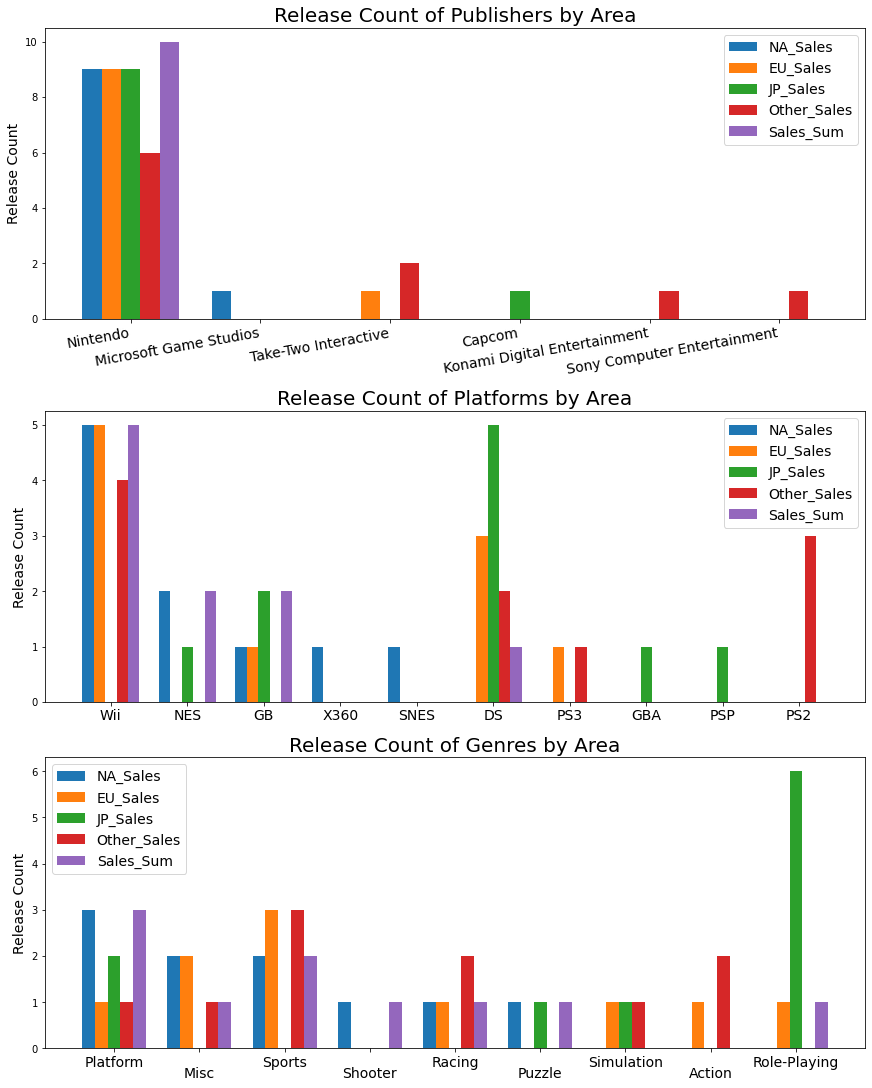

In [ ]:
def relCountByTopicsBar():
  fig, axes = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)
  width = 0.15  # the width of the bars

  # 출고량 - 퍼블리셔
  x5 = np.arange(len(df_topten_area_pb.index))
  axes[0].bar(x5 - width*2, df_topten_area_pb['NA_Sales'], width, label=sales_col_xtend[0])
  axes[0].bar(x5 - width, df_topten_area_pb['EU_Sales'], width, label=sales_col_xtend[1])
  axes[0].bar(x5, df_topten_area_pb['JP_Sales'], width, label=sales_col_xtend[2])
  axes[0].bar(x5 + width, df_topten_area_pb['Other_Sales'], width, label=sales_col_xtend[3])
  axes[0].bar(x5 + width*2, df_topten_area_pb['Sales_Sum'], width, label=sales_col_xtend[4])

  axes[0].set_ylabel('Release Count', fontsize=14)
  axes[0].set_title('Release Count of Publishers by Area', fontsize=20)
  axes[0].set_xticks(x5)
  axes[0].set_xticklabels(df_topten_area_pb.index, fontsize=14, rotation=10, ha='right')
  # for tick in axes[0].xaxis.get_major_ticks()[1::2]:
  #   tick.set_pad(15)
  axes[0].legend(fontsize=14)

  # 출고량 - 플랫폼
  x4 = np.arange(len(df_topten_area_pf.index))
  axes[1].bar(x4 - width*2, df_topten_area_pf['NA_Sales'], width, label=sales_col_xtend[0])
  axes[1].bar(x4 - width, df_topten_area_pf['EU_Sales'], width, label=sales_col_xtend[1])
  axes[1].bar(x4, df_topten_area_pf['JP_Sales'], width, label=sales_col_xtend[2])
  axes[1].bar(x4 + width, df_topten_area_pf['Other_Sales'], width, label=sales_col_xtend[3])
  axes[1].bar(x4 + width*2, df_topten_area_pf['Sales_Sum'], width, label=sales_col_xtend[4])

  axes[1].set_ylabel('Release Count', fontsize=14)
  axes[1].set_title('Release Count of Platforms by Area', fontsize=20)
  axes[1].set_xticks(x4)
  axes[1].set_xticklabels(df_topten_area_pf.index, fontsize=14)
  axes[1].legend(fontsize=14)

  # 출고량 - 장르
  x6 = np.arange(len(df_topten_area_gr.index))
  axes[2].bar(x6 - width*2, df_topten_area_gr['NA_Sales'], width, label=sales_col_xtend[0])
  axes[2].bar(x6 - width, df_topten_area_gr['EU_Sales'], width, label=sales_col_xtend[1])
  axes[2].bar(x6, df_topten_area_gr['JP_Sales'], width, label=sales_col_xtend[2])
  axes[2].bar(x6 + width, df_topten_area_gr['Other_Sales'], width, label=sales_col_xtend[3])
  axes[2].bar(x6 + width*2, df_topten_area_gr['Sales_Sum'], width, label=sales_col_xtend[4])

  axes[2].set_ylabel('Release Count', fontsize=14)
  axes[2].set_title('Release Count of Genres by Area', fontsize=20)
  axes[2].set_xticks(x6)
  axes[2].set_xticklabels(df_topten_area_gr.index, fontsize=14)
  for tick in axes[2].xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
  axes[2].legend(fontsize=14)

  # lines, labels = fig.axes[-1].get_legend_handles_labels()
  # fig.legend(lines, labels, loc = 'upper right', fontsize=14)
  # plt.tight_layout()  

relCountByTopicsBar()
plt.show()

# 출고량 총계 및 지역별 상위 10개의 게임을 가져온 결과, Publisher가 Nintendo인 게임이 대부분을 차지함
# 플랫폼은 Wii, DS 등 Nintendo 계열 플랫폼이 다수임
# 장르는 Sports와 Platform의 비중이 크며, JP의 경우만 두드러지게 Role-Playing이 과반수를 넘게 차지함
# 게임 장르별 출고량에서 1위였던 Action은 단 2개의 타이틀만 목록에 존재

# 한계점 존재. 데이터가 1980년의 게임까지 포함하고 있으므로 최신의 유행을 제대로 반영한다고 볼 수 없음
# 또한 게임의 출고량이 누적 출고량이므로 해당 게임이 출시된 년도에만 판매가 많이 이루어졌는지, 꾸준히 판매가 이루어졌는지 알 수 없음
# 따라서 데이터의 최근 10년 간의 데이터를 가져온 후 위 시각화 과정을 재시행하여 결과 확인하기

# 3. 프로젝트 결과 도출하기
다음 분기에 어떤 게임을 설계해야 할까?

In [ ]:
# 흥미로운 부분 : 장르별 전체 출고량에서 Action이 1등임
# 하지만 전체 그리고 지역별로 출고량 상위 10개 게임들의 장르를 보면 Action은 소수에 불과(GTA San Andreas와 GTA5 둘뿐임)
# 이는 Action 장르의 게임은 소수의 타이틀에만 국한되지 않고 장르 내 게임 전체적으로 출고량이 어느 정도 있음을 보여줌

# Nintendo의 경우 하드웨어와 소프트웨어 대부분 자체적으로 제작 및 판매하는 회사이므로 비교 대상에서 제외하기로 결정

# 미션 : 초기 데이터(df)에서 Publisher - Nintendo 제외하기
# 그 후 위에서 진행한 과정을 다시 한 후 그 결과 확인

In [ ]:
# df2 = df.loc[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2013)]
df2 = df.loc[(df['Publisher'] != 'Nintendo')]
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
# 2-1. 지역에 따라서 선호하는 게임 장르가 다를까
# 지역별 출고량을 비교하여 각 지역별 게임 장르 선호도가 다른지 알아보고자 함
df_genre = df2.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Other_Sales']

# 지역별 출고량 규모가 다르므로 정규화를 하여 데이터의 스케일을 맞춰줌
scaler = MinMaxScaler()
df_genre_norm = pd.DataFrame(scaler.fit_transform(df_genre), columns=df_genre.columns, index=df_genre.index)

# 지역별 출고량 간의 상관관계 분석
df_genre.corr()
# 분석 결과 다른 3개 지역이 서로 비슷한 것에 비해 JP(일본) 지역은 다소 다른 경향을 보임을 알 수 있다.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.989817,0.285438,0.990636
EU_Sales,0.989817,1.000000,0.280245,0.996073
JP_Sales,0.285438,0.280245,1.000000,0.314498
Other_Sales,0.990636,0.996073,0.314498,1.000000


In [ ]:
# 정규화한 데이터를 바탕으로 각 지역별 게임 장르 선호도의 순위를 나열
df_rank = pd.DataFrame()
for sales in sales_col:
  df_rank[sales] = df_genre_norm[sales].rank(ascending=False).sort_values().index

df_rank.index += 1
df_rank.index.name = 'Ranking'
df_rank
# NA, EU, Other 지역에서는 Action, Sports, Shooter 순으로 선호하는 것을 알 수 있음
# 이와 달리 JP 지역은 Role-Playing을 가장 선호하고 그 이후에 Action, Sports를 선호하는 것으로 나타남

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Ranking,,,,
1,Action,Action,Role-Playing,Action
2,Sports,Sports,Action,Sports
3,Shooter,Shooter,Sports,Shooter
4,Misc,Racing,Fighting,Racing
5,Racing,Misc,Misc,Misc
6,Platform,Role-Playing,Adventure,Role-Playing
7,Role-Playing,Platform,Simulation,Fighting
8,Fighting,Fighting,Strategy,Platform
9,Simulation,Simulation,Shooter,Simulation


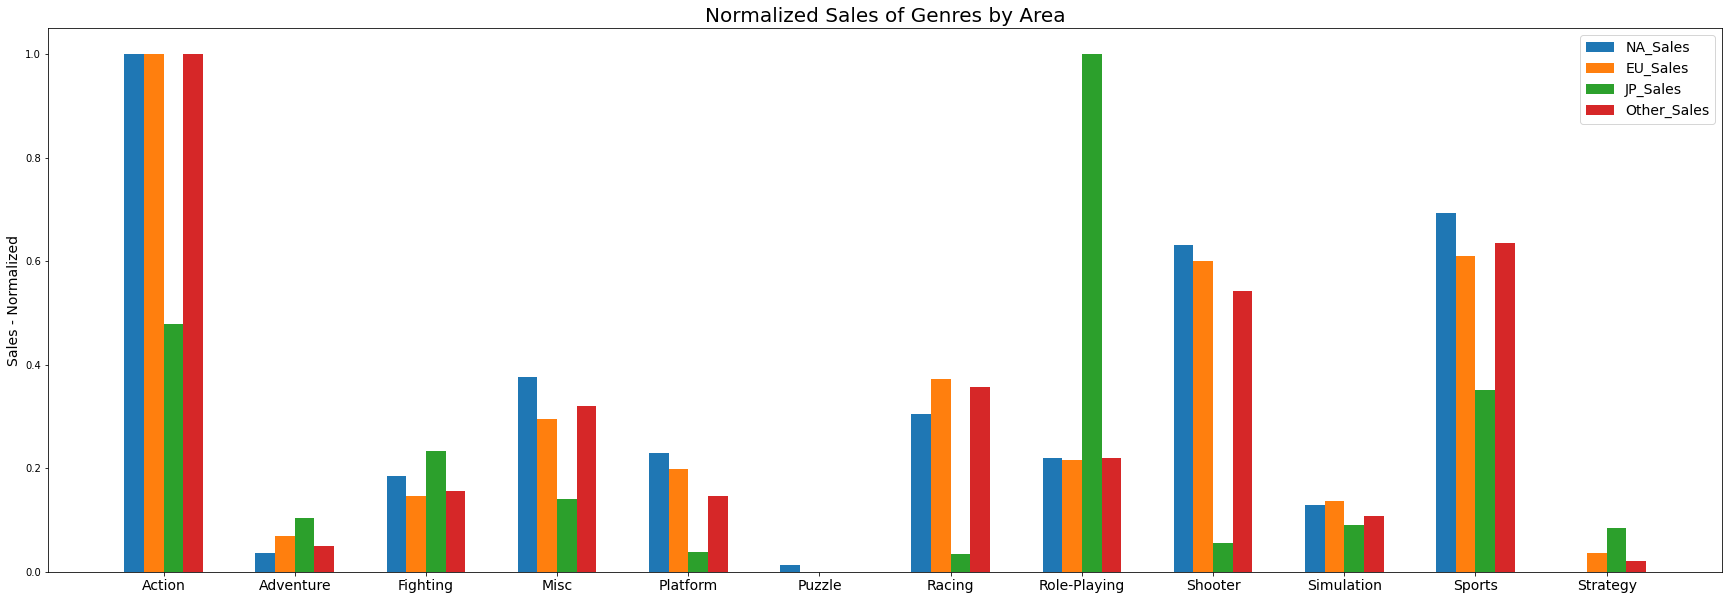

In [ ]:
# 정규화한 데이터를 이용하여 지역별 게임 장르 선호도를 시각화
genre_sales_norm = [df_genre_norm['NA_Sales'], df_genre_norm['EU_Sales'], df_genre_norm['JP_Sales'], df_genre_norm['Other_Sales']]

genresByAreaBar()
plt.show()

# JP 지역의 Role-Playing 선호도가 다른 지역에 비해 압도적으로 높은 것을 알 수 있음
# NA, EU, Other 지역의 선호도는 대체적으로 비슷한 것으로 보임

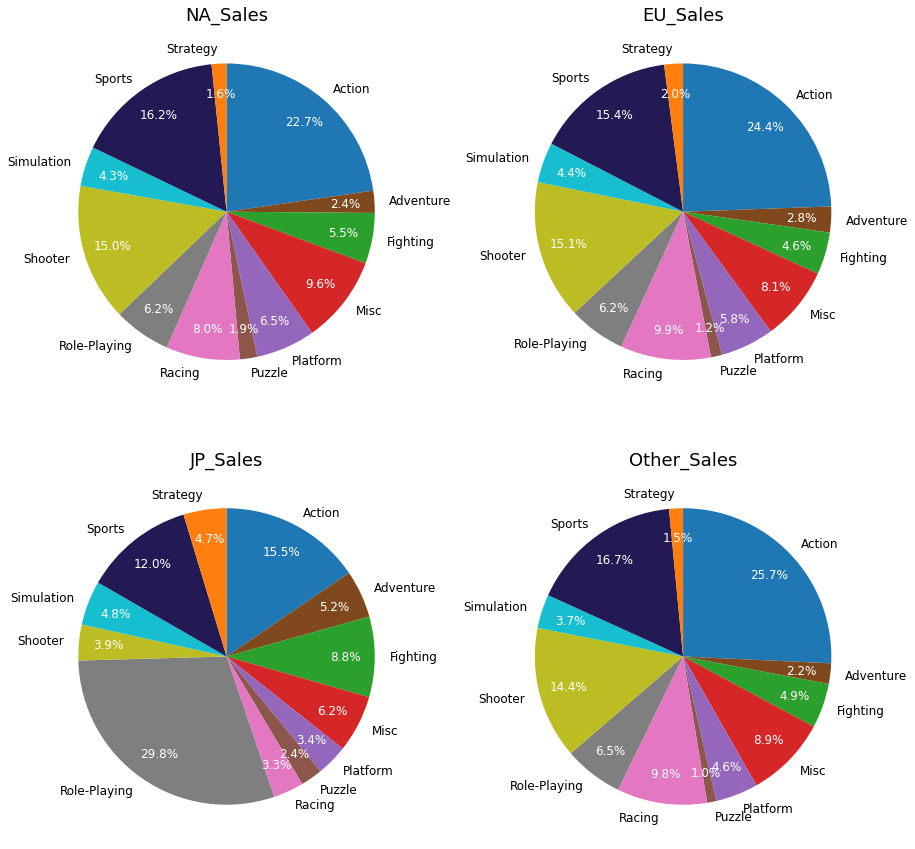

In [ ]:
# 각 지역별 게임 장르 각각이 차지하는 출고량 비율을 시각화함(정규화하지 않은 데이터)
genre_sales = [df_genre['NA_Sales'], df_genre['EU_Sales'], df_genre['JP_Sales'], df_genre['Other_Sales']]

genresByAreaPie()
plt.show()

In [ ]:
# 2-2. 연도별 게임의 트렌드가 있을까
df_trend = df2[['Year', 'Genre', 'Platform']]

# 연도별 각 게임 장르 출시 횟수 데이터를 가져옴(tidy data)
count_yg = pd.DataFrame(df_trend[['Year', 'Genre']].value_counts())
count_yg.rename(columns = {0:'Count'}, inplace=True)
count_yg.reset_index(inplace=True)
count_yg

# tidy -> wide 형태로 전환
pivot_yg = count_yg.pivot_table(index=['Year'], columns=['Genre'], values=['Count'])
pivot_yg = pivot_yg['Count'].fillna(0)

# 2017년과 2020년의 데이터를 제외시킴
# 2016년까지의 데이터 추세에 비교했을 때 17년과 20년은 데이터 수집이 완전하지 못하여 수치가 현저히 낮은 것으로 판단하였음
# 이를 그대로 포함시킬 경우 이후의 분석에 있어 잘못된 결과를 얻을 위험이 있음
pivot_yg.drop([2017, 2020], axis=0, inplace=True)

# 매년 각 장르별 출시 횟수를 백분위로 변경
pivot_yg = pivot_yg.div(pivot_yg.sum(axis=1), axis=0)

# 연도별 각 게임 플랫폼별 게임 출시 횟수 데이터를 가져옴(tidy data)
count_yp = pd.DataFrame(df_trend[['Year', 'Platform']].value_counts())
count_yp.rename(columns = {0:'Count'}, inplace=True)
count_yp.reset_index(inplace=True)

# tidy -> wide 형태로 전환
pivot_yp = count_yp.pivot_table(index=['Year'], columns=['Platform'], values=['Count'])
pivot_yp = pivot_yp['Count'].fillna(0)

# 2017년과 2020년의 데이터를 제외시킴
# 2016년까지의 데이터 추세에 비교했을 때 17년과 20년은 데이터 수집이 완전하지 못하여 수치가 현저히 낮은 것으로 판단하였음
# 이를 그대로 포함시킬 경우 이후의 분석에 있어 잘못된 결과를 얻을 위험이 있음
pivot_yp.drop([2017, 2020], axis=0, inplace=True)

# 매년 각 플랫폼별 출시 횟수를 백분위로 변경
pivot_yp = pivot_yp.div(pivot_yp.sum(axis=1), axis=0)

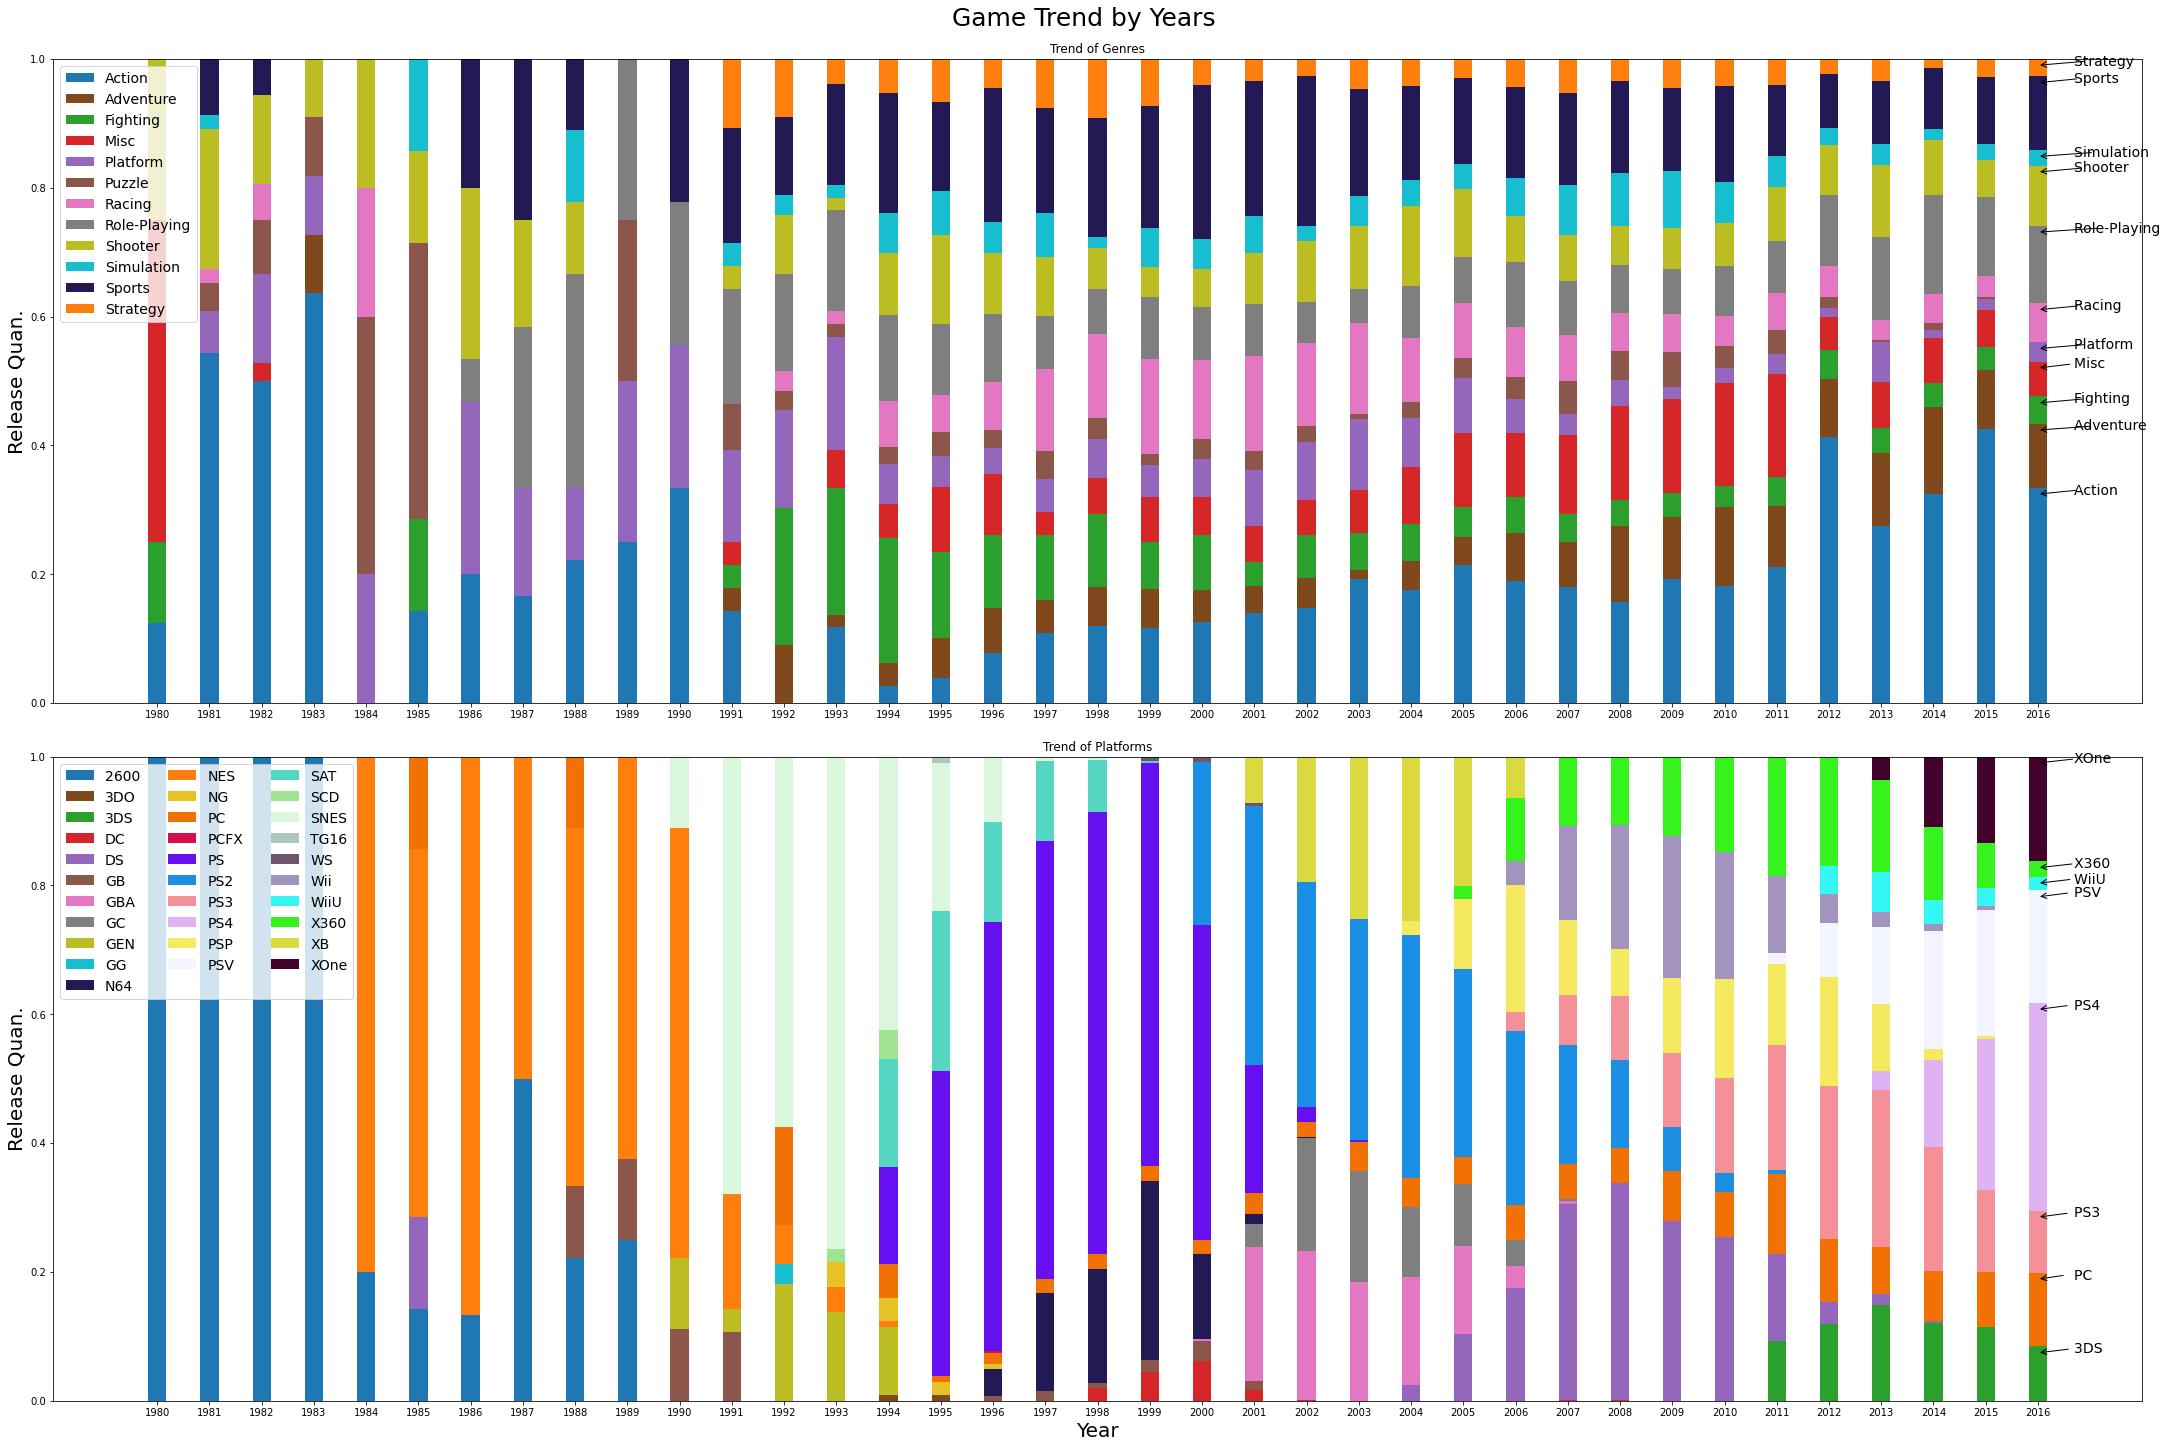

In [ ]:
# 연도별 게임 출시 횟수의 백분율을 장르/플랫폼으로 구분하여 바 차트로 시각화
range_of_year = 0
year = pivot_yp.index[range_of_year:]
platforms = pivot_yp.columns
yg = pivot_yg[range_of_year:]
yp = pivot_yp[range_of_year:]

N = len(year)
ind = np.arange(N)
width = 0.35

trendByYearsBar()
plt.show()

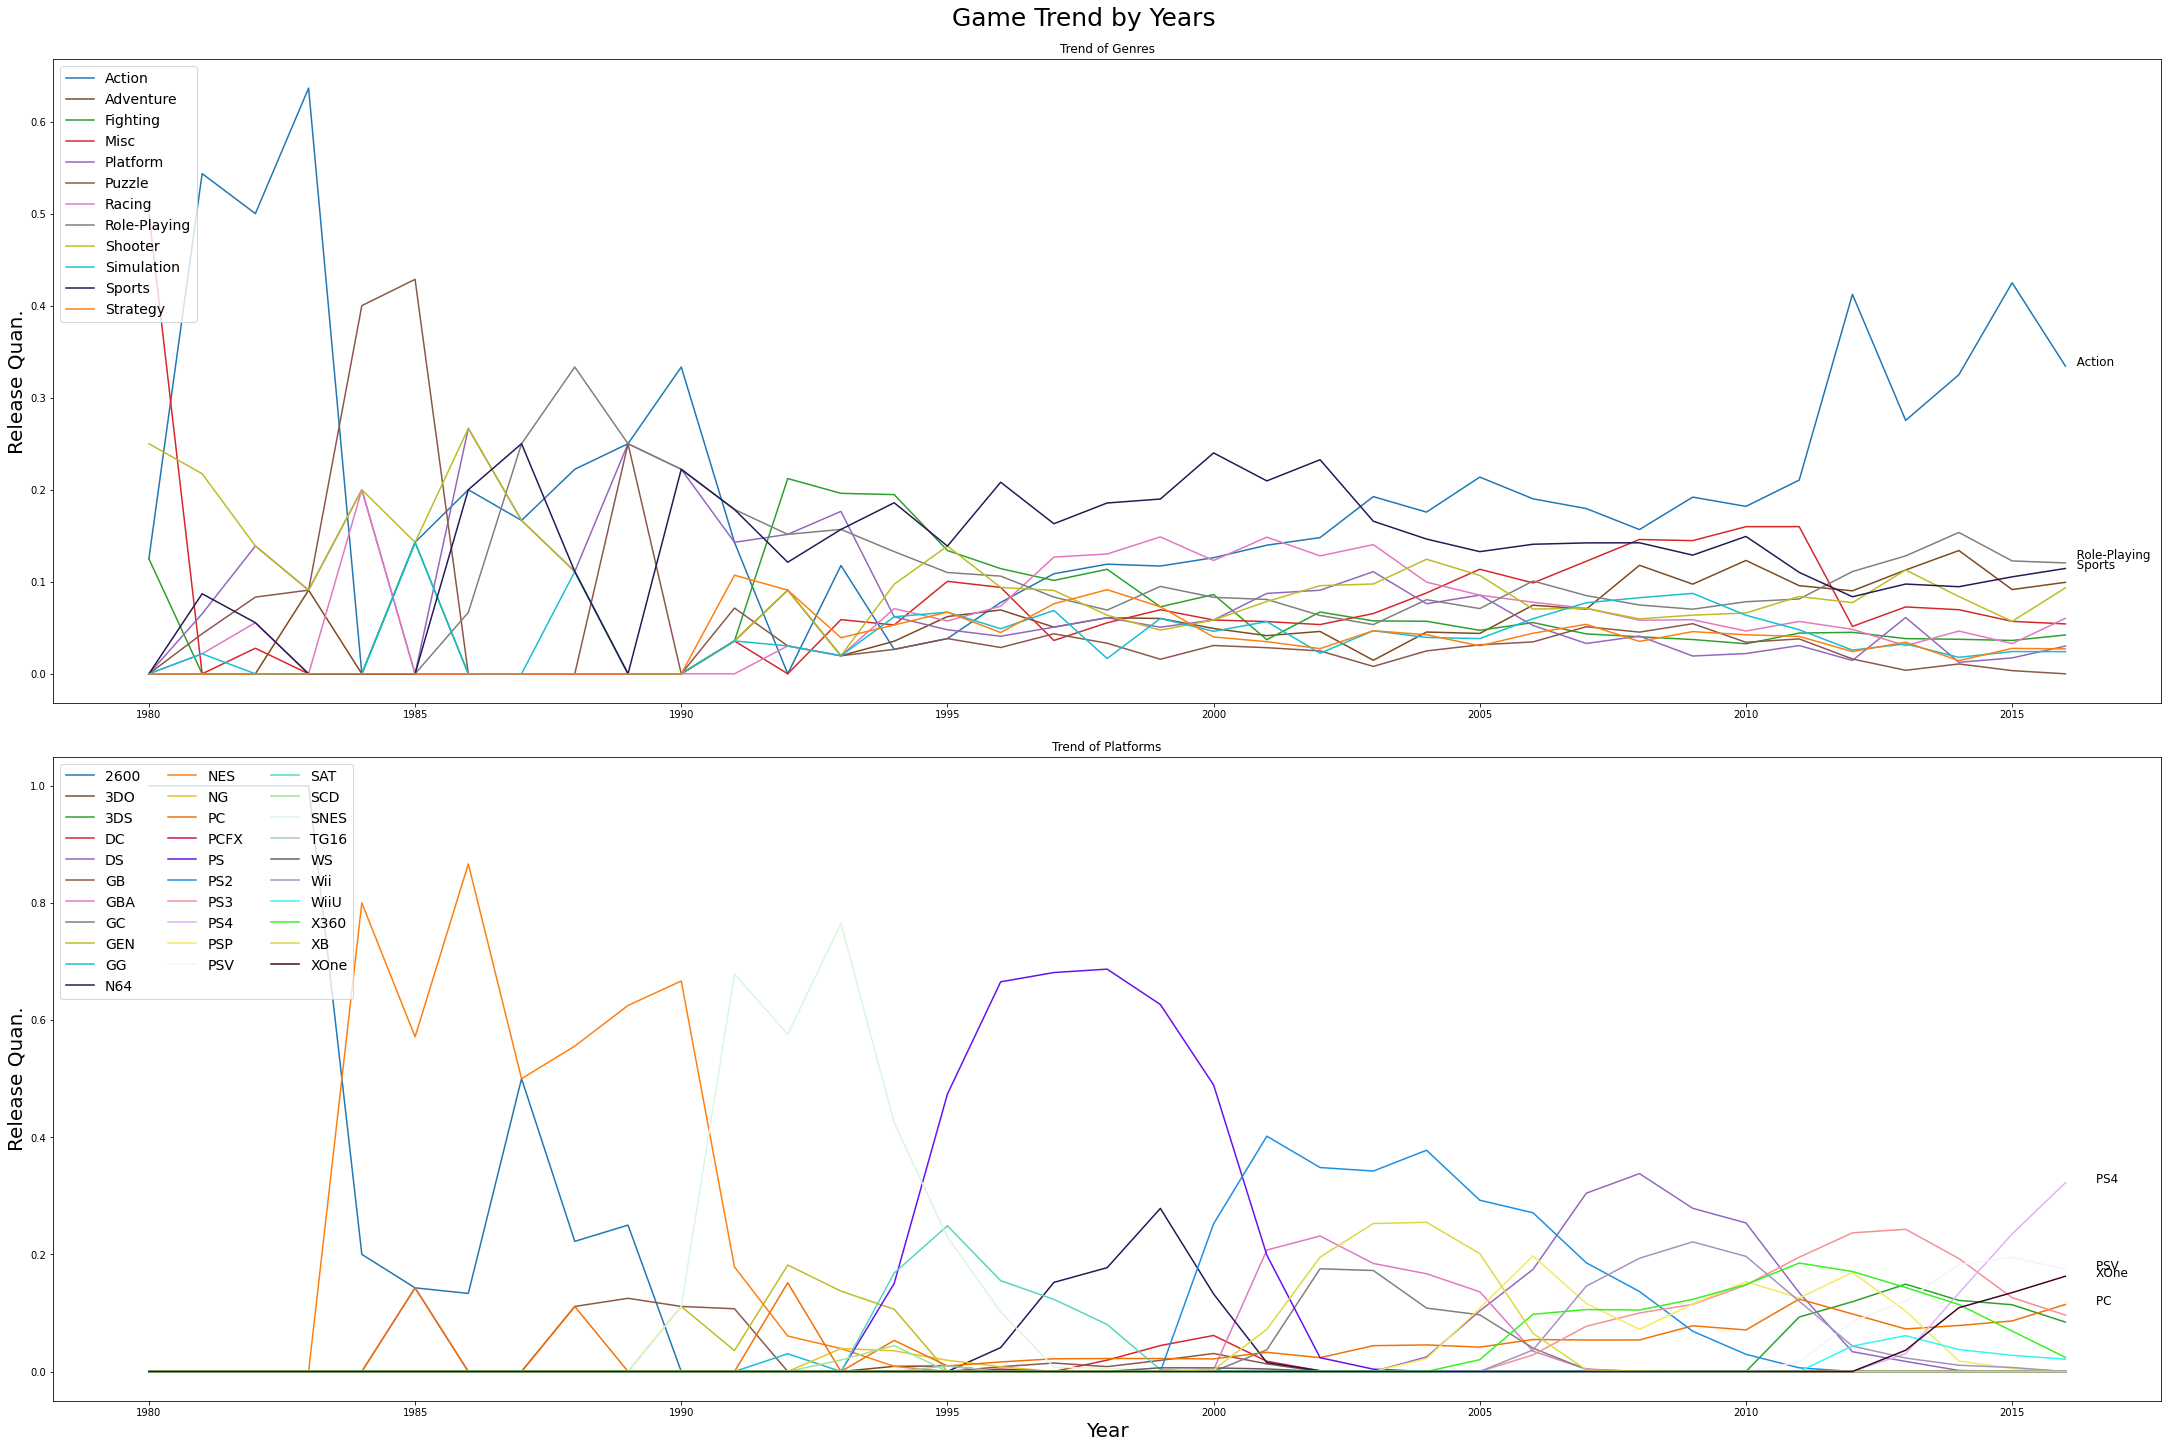

In [ ]:
# 연도별 게임 장르 트렌드와 플랫폼별 트렌드를 라인 차트로 표현
trendByYearsLine()
plt.show();

In [ ]:
# 2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
# 출고량 총계 상위 10개 게임 데이터 가져오기(Nintendo 제외)
df_ranking = df2.sort_values(by=['Sales_Sum'], ascending=False).reset_index(drop=True)
df_topten = df_ranking.head(10)

# 출고량 지역별 상위 10개 게임 데이터 가져오기(Nintendo 제외)
df_topten_na = df_ranking.sort_values(by=['NA_Sales'], ascending=False).head(10)
df_topten_eu = df_ranking.sort_values(by=['EU_Sales'], ascending=False).head(10)
df_topten_jp = df_ranking.sort_values(by=['JP_Sales'], ascending=False).head(10)
df_topten_ot = df_ranking.sort_values(by=['Other_Sales'], ascending=False).head(10)

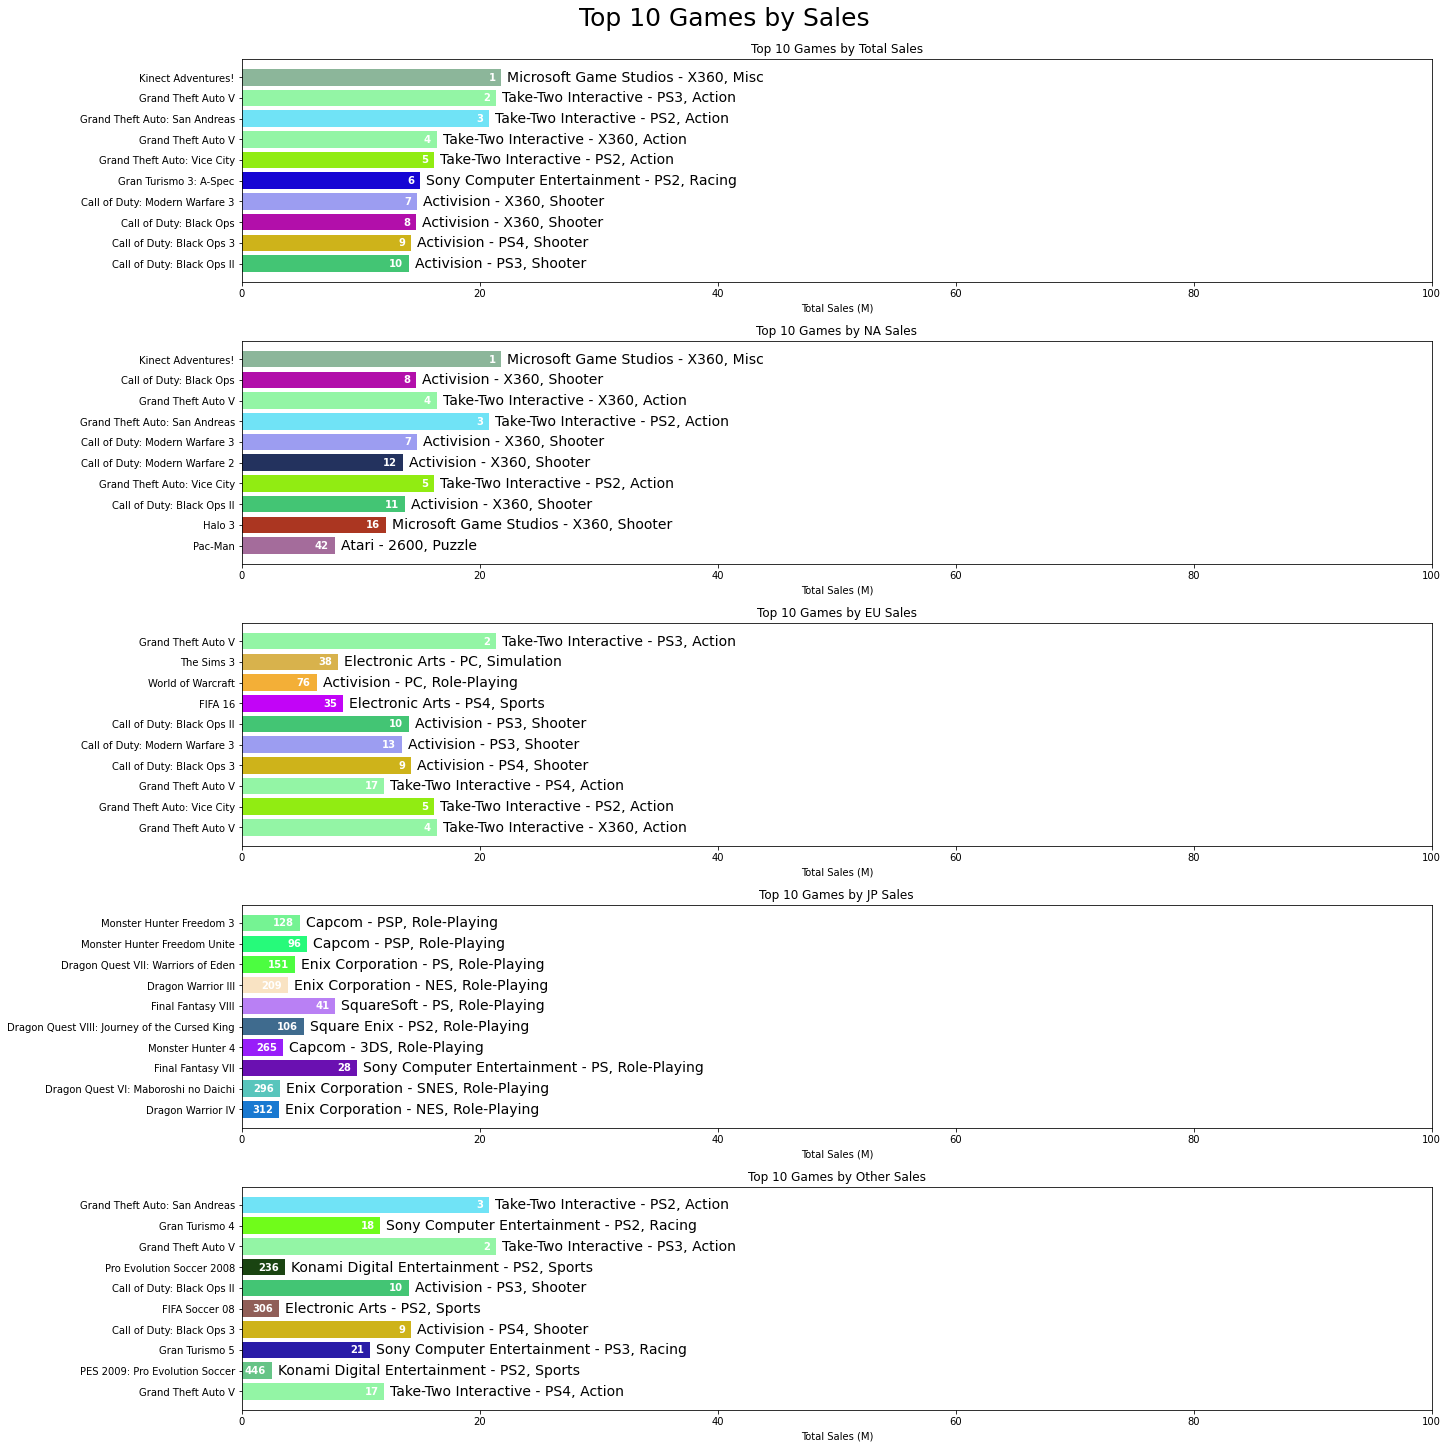

In [ ]:
# 출고량 상위 10개 게임에 대하여 bar chart로 시각화(총계 및 4개 지역별) (Nintendo 제외)
topTenGamesBars()
plt.show();

In [ ]:
# 게임 출고량 상위 10개에 대하여 퍼블리셔/플랫폼/장르별 게임 출시 횟수 시각화
df_topten_pb = df_topten['Publisher'].value_counts()
df_topten_pf = df_topten['Platform'].value_counts()
df_topten_gr = df_topten['Genre'].value_counts()

In [ ]:
sales_col_xtend = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sales_Sum']

df_topten_na_pb = df_topten_na['Publisher'].value_counts()
df_topten_na_pf = df_topten_na['Platform'].value_counts()
df_topten_na_gr = df_topten_na['Genre'].value_counts()
df_topten_eu_pb = df_topten_eu['Publisher'].value_counts()
df_topten_eu_pf = df_topten_eu['Platform'].value_counts()
df_topten_eu_gr = df_topten_eu['Genre'].value_counts()
df_topten_jp_pb = df_topten_jp['Publisher'].value_counts()
df_topten_jp_pf = df_topten_jp['Platform'].value_counts()
df_topten_jp_gr = df_topten_jp['Genre'].value_counts()
df_topten_ot_pb = df_topten_ot['Publisher'].value_counts()
df_topten_ot_pf = df_topten_ot['Platform'].value_counts()
df_topten_ot_gr = df_topten_ot['Genre'].value_counts()

df_topten_area_pb = pd.concat([df_topten_na_pb, df_topten_eu_pb, df_topten_jp_pb, df_topten_ot_pb, df_topten_pb], axis=1).fillna(0)
df_topten_area_pf = pd.concat([df_topten_na_pf, df_topten_eu_pf, df_topten_jp_pf, df_topten_ot_pf, df_topten_pf], axis=1).fillna(0)
df_topten_area_gr = pd.concat([df_topten_na_gr, df_topten_eu_gr, df_topten_jp_gr, df_topten_ot_gr, df_topten_gr], axis=1).fillna(0)
df_topten_area_pf.columns = sales_col_xtend
df_topten_area_pb.columns = sales_col_xtend
df_topten_area_gr.columns = sales_col_xtend

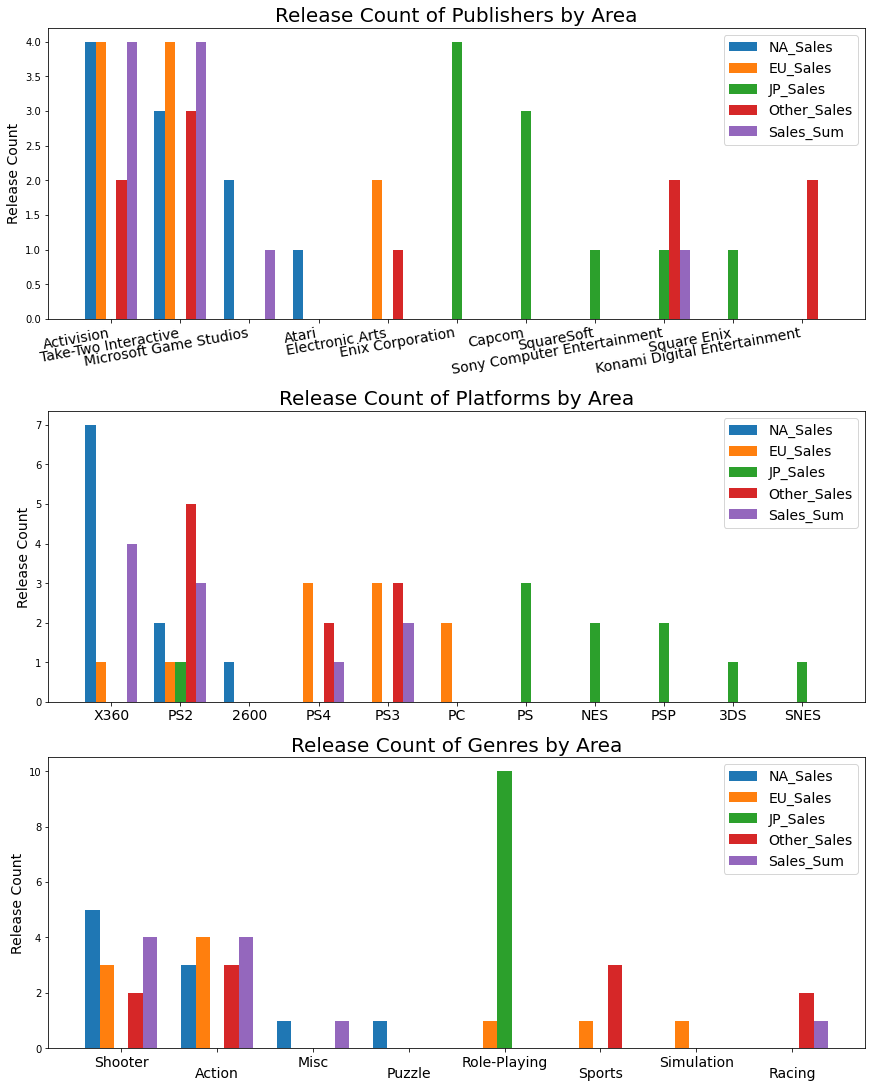

In [ ]:
relCountByTopicsBar()
plt.show()

# Nintendo Publisher 제외, 2010년도 데이터부터 포함
# 출고량 총계 및 지역별 상위 10개의 게임을 가져온 결과, Nintendo가 대부분을 차지했던 이전과 다르게 다양한 Publisher의 게임들이 목록에 오름
# 플랫폼은 X360, PS3의 비중이 큼
# 장르는 Sports와 Action의 비중이 크며, JP의 경우 상위 10개 모두 Role-Playing임

In [ ]:
# 출시 횟수에서 점유율을 늘리고 있는 PS4와 XOne의 출시 년도를 기준으로 데이터 살펴보기
df3 = df2.loc[df['Year'] >= 2013]
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01
24,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
43,Crysis 3,X360,2013,Shooter,Electronic Arts,0.51,0.33,0.01,0.08,0.93
...,...,...,...,...,...,...,...,...,...,...
16219,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16220,Yoru no Nai Kuni,PS4,2015,Role-Playing,Tecmo Koei,0.00,0.00,0.08,0.00,0.08
16225,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


In [ ]:
# 2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
# 출고량 총계 상위 10개 게임 데이터 가져오기(Nintendo 제외)
df_ranking = df3.sort_values(by=['Sales_Sum'], ascending=False).reset_index(drop=True)
df_topten = df_ranking.head(10)

# 출고량 지역별 상위 10개 게임 데이터 가져오기(Nintendo 제외)
df_topten_na = df_ranking.sort_values(by=['NA_Sales'], ascending=False).head(10)
df_topten_eu = df_ranking.sort_values(by=['EU_Sales'], ascending=False).head(10)
df_topten_jp = df_ranking.sort_values(by=['JP_Sales'], ascending=False).head(10)
df_topten_ot = df_ranking.sort_values(by=['Other_Sales'], ascending=False).head(10)

In [ ]:
toptens = pd.concat([df_topten, df_topten_na, df_topten_eu, df_topten_jp, df_topten_ot]).drop_duplicates().reset_index(drop=True)
toptens['Platform'].value_counts()
toptens['Genre'].value_counts()

Shooter         7
Action          6
Role-Playing    5
Sports          4
Misc            2
Name: Genre, dtype: int64

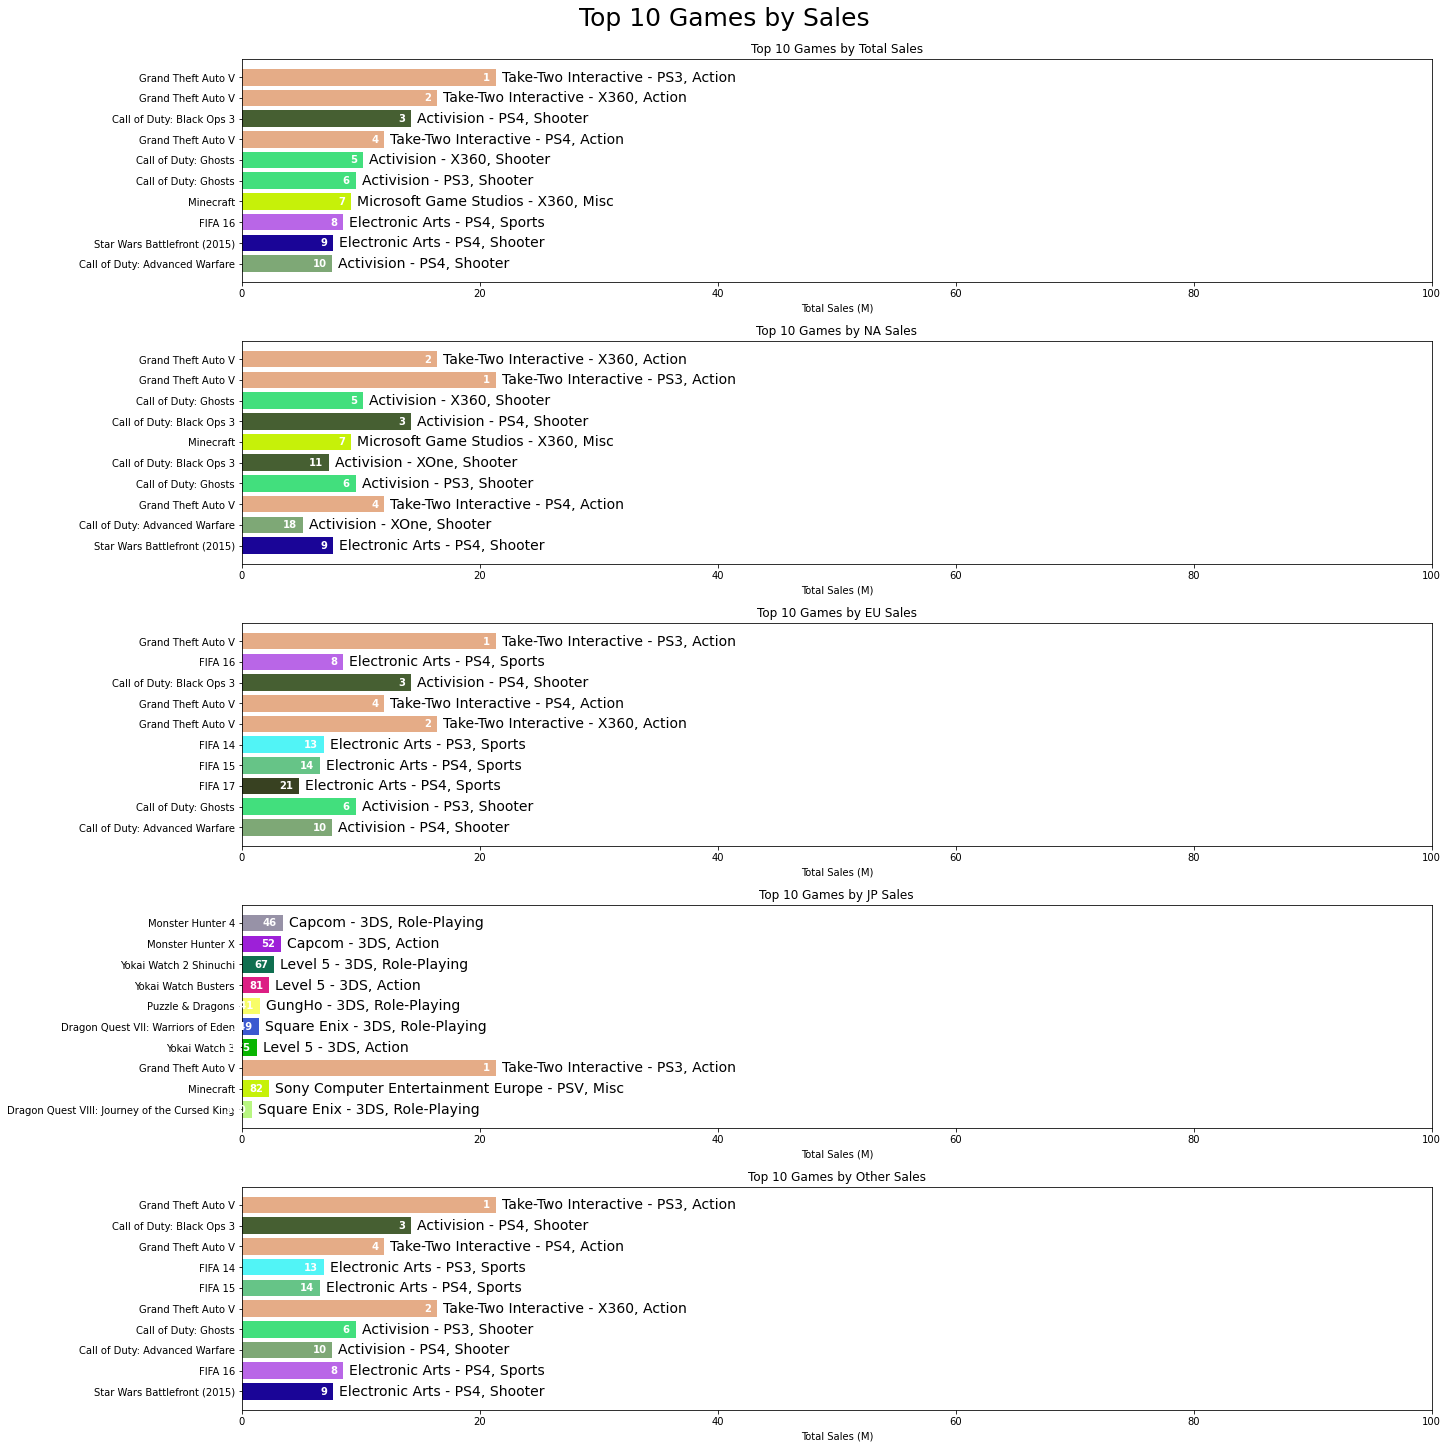

In [ ]:
# 출고량 상위 10개 게임에 대하여 bar chart로 시각화(총계 및 4개 지역별) (Nintendo 제외)
topTenGamesBars()
plt.show();

In [ ]:
# 게임 출고량 상위 10개에 대하여 퍼블리셔/플랫폼/장르별 게임 출시 횟수 시각화
df_topten_pb = df_topten['Publisher'].value_counts()
df_topten_pf = df_topten['Platform'].value_counts()
df_topten_gr = df_topten['Genre'].value_counts()

In [ ]:
sales_col_xtend = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sales_Sum']

df_topten_na_pb = df_topten_na['Publisher'].value_counts()
df_topten_na_pf = df_topten_na['Platform'].value_counts()
df_topten_na_gr = df_topten_na['Genre'].value_counts()
df_topten_eu_pb = df_topten_eu['Publisher'].value_counts()
df_topten_eu_pf = df_topten_eu['Platform'].value_counts()
df_topten_eu_gr = df_topten_eu['Genre'].value_counts()
df_topten_jp_pb = df_topten_jp['Publisher'].value_counts()
df_topten_jp_pf = df_topten_jp['Platform'].value_counts()
df_topten_jp_gr = df_topten_jp['Genre'].value_counts()
df_topten_ot_pb = df_topten_ot['Publisher'].value_counts()
df_topten_ot_pf = df_topten_ot['Platform'].value_counts()
df_topten_ot_gr = df_topten_ot['Genre'].value_counts()

df_topten_area_pb = pd.concat([df_topten_na_pb, df_topten_eu_pb, df_topten_jp_pb, df_topten_ot_pb, df_topten_pb], axis=1).fillna(0)
df_topten_area_pf = pd.concat([df_topten_na_pf, df_topten_eu_pf, df_topten_jp_pf, df_topten_ot_pf, df_topten_pf], axis=1).fillna(0)
df_topten_area_gr = pd.concat([df_topten_na_gr, df_topten_eu_gr, df_topten_jp_gr, df_topten_ot_gr, df_topten_gr], axis=1).fillna(0)
df_topten_area_pf.columns = sales_col_xtend
df_topten_area_pb.columns = sales_col_xtend
df_topten_area_gr.columns = sales_col_xtend

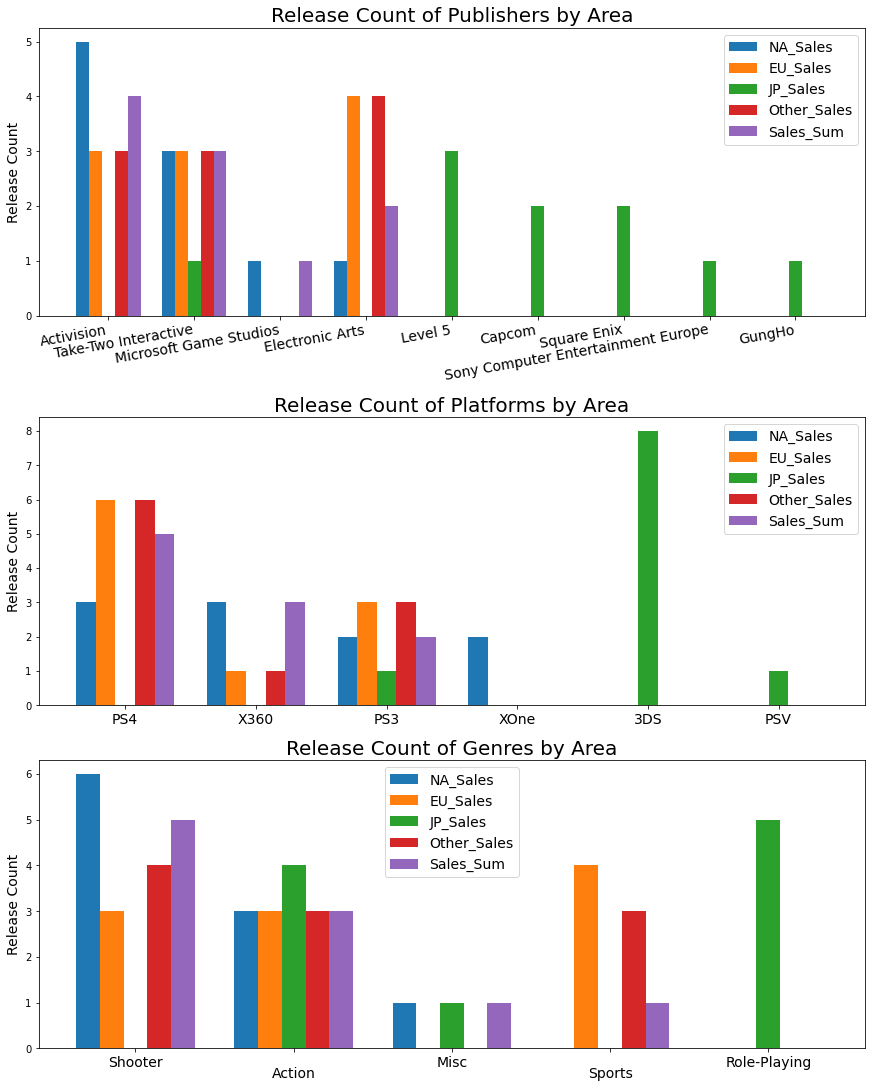

In [ ]:
relCountByTopicsBar()
plt.show()

# Nintendo Publisher 제외, 2010년도 데이터부터 포함
# 출고량 총계 및 지역별 상위 10개의 게임을 가져온 결과, Nintendo가 대부분을 차지했던 이전과 다르게 다양한 Publisher의 게임들이 목록에 오름
# 플랫폼은 X360, PS3의 비중이 큼
# 장르는 Sports와 Action의 비중이 크며, JP의 경우 상위 10개 모두 Role-Playing임

In [ ]:
df3_pf = df3.groupby(['Platform']).sum().loc[:, 'NA_Sales':'Other_Sales']
df3_pf

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,7.27,5.58,33.62,1.13
DS,1.01,1.07,0.00,0.19
PC,10.28,22.83,0.00,3.65
PS3,62.59,73.46,23.12,29.95
PS4,95.80,122.94,14.04,43.00
PSP,0.00,0.19,3.29,0.07
PSV,7.43,8.21,17.61,4.57
Wii,7.30,6.73,0.05,1.29
WiiU,8.51,5.68,1.37,1.34


In [ ]:
# 플랫폼별 출고량 알아보기(PS4, XOne 출시년도 이후)

# 지역별 출고량 규모가 다르므로 정규화를 하여 데이터의 스케일을 맞춰줌
scaler = MinMaxScaler()
df3_pf_norm = pd.DataFrame(scaler.fit_transform(df3_pf), columns=df3_pf.columns, index=df3_pf.index)

# 지역별 출고량 간의 상관관계 분석
df3_pf.corr()
# 분석 결과 다른 3개 지역이 서로 비슷한 것에 비해 JP(일본) 지역은 다소 다른 경향을 보임을 알 수 있다.

# 정규화한 데이터를 바탕으로 각 지역별 게임 장르 선호도의 순위를 나열
df3_rank = pd.DataFrame()
for sales in sales_col:
  df3_rank[sales] = df3_pf_norm[sales].rank(ascending=False).sort_values().index

df3_rank.index += 1
df3_rank.index.name = 'Ranking'
df3_rank
df3_pf_norm

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,0.075887,0.043910,1.000000,0.024691
DS,0.010543,0.007169,0.000000,0.002795
PC,0.107307,0.184440,0.000000,0.083392
PS3,0.653340,0.596904,0.687686,0.696017
PS4,1.000000,1.000000,0.417609,1.000000
PSP,0.000000,0.000000,0.097858,0.000000
PSV,0.077557,0.065336,0.523795,0.104822
Wii,0.076200,0.053279,0.001487,0.028418
WiiU,0.088831,0.044725,0.040750,0.029583


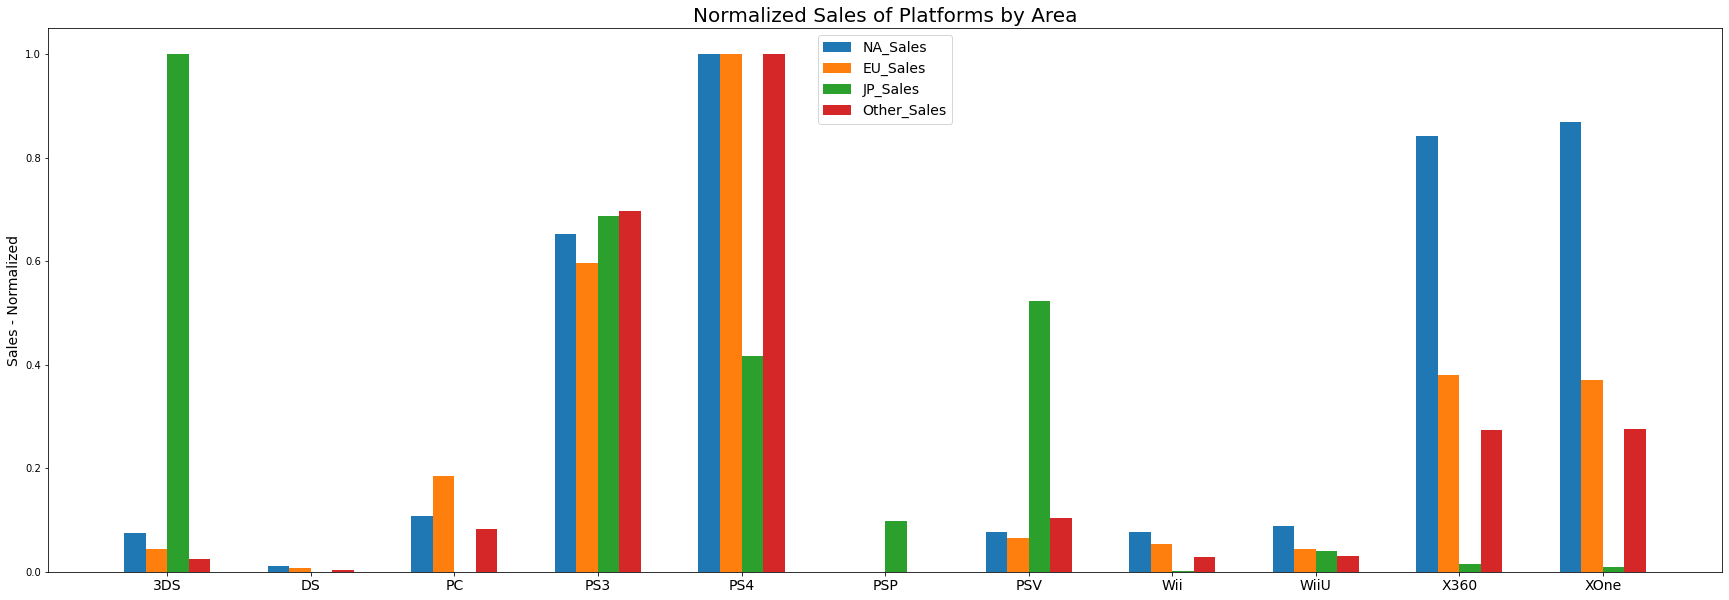

In [ ]:
# 정규화한 데이터를 이용하여 지역별 게임 플랫폼 출고량을 시각화
pf_sales_norm = [df3_pf_norm['NA_Sales'], df3_pf_norm['EU_Sales'], df3_pf_norm['JP_Sales'], df3_pf_norm['Other_Sales']]
pf_labels = df3_pf_norm.index

x = np.arange(len(pf_labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width*3/2, pf_sales_norm[0], width, label=sales_col[0])
rects2 = ax.bar(x - width/2, pf_sales_norm[1], width, label=sales_col[1])
rects3 = ax.bar(x + width/2, pf_sales_norm[2], width, label=sales_col[2])
rects4 = ax.bar(x + width*3/2, pf_sales_norm[3], width, label=sales_col[3])

ax.set_ylabel('Sales - Normalized', fontsize=14)
ax.set_title('Normalized Sales of Platforms by Area', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(pf_labels, fontsize=14)
ax.legend(fontsize=14)

plt.show()

In [ ]:
# 결론
# 장르 : Action
# 플랫폼 : PS4

# Publisher 중 Nintendo를 제외한 2010년부터의 데이터를 통해 모든 지역에서 Action 장르를 선호하는 것을 확인
# 지역별 출고량을 비교한 데이터 및 매년의 게임 출시 트렌드 데이터를 통해서 Action 장르는 가장 많이, 그리고 지속적으로 점유율을 차지하고 있음

# 플랫폼은 PS4로 결정
# 게임 출시 트렌드를 시각화한 그래프에서 PS4와 XOne이 빠르게 출시 횟수의 점유율이 늘어나고 있음을 확인
# 마침 PS4와 XOne의 출시 년도가 동일(2013년)하여 이 연도부터의 데이터를 가져와서 확인하였음
# 그 결과 지역별 출고량 상위 10개 게임 중 PS4로 출시된 게임이 가장 많았으며(15개 - 미국3, 유럽6, 기타6), 출고량 총계 상위 10개 게임에서도 PS4 게임이 5개로 과반수를 차지함
# 또한 2013년 이후 출시된 모든 게임의 출고량을 통틀어 PS4로 출시된 게임이 가장 큰 비율을 차지함